# Project Name :Bank GoodCredit( Client Project)
## Team Id: PTID-CDS-DEC-24-2258

## Project Type: Binary Classification 
### Contribution: Anjali Kumbhar and Aarti Salunkhe

## Project Summary

This project aims to predict which customers at Bank GoodCredit are at risk of having bad credit. By analyzing customer account, enquiry, and demographic data, the goal is to identify key factors that impact credit risk. The model will help the bank reduce bad debt and make better decisions about who to offer credit to. The model's performance will be measured using Gini and rank ordering.

## Problem Statement:

#### Objective: Predict whether a customer has a good or bad credit history based on historical account behavior, customer demographics, and enquiry data.
- Target Variable: Bad_label
- 0 → Good credit history
- 1 → Bad credit history (i.e., customer falls into the 30 DPD+ bucket)
- Key Business Goal: By identifying high-risk customers, the bank can:
- Reduce credit default risk.
- Improve targeted marketing and credit offerings.
- Optimize the risk management strategy.


### Importing All The Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,f1_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import pickle
import math
from collections import Counter
from imblearn.over_sampling import SMOTE

import os
import mysql.connector

### Importing Required Packages

In [2]:
!pip install pandas mysql-connector-python
!pip install pymysql
!pip install mysql-connector

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
host = '18.136.157.135'
port = 3306
username = 'dm_team1'
password = 'DM!$Team&279@20!'
database = 'project_banking'

### Establish the connection

In [4]:
connection=mysql.connector.connect(
    host=host,
    port=port,
    user=username,
    password=password,
    database=database
)
# Check if the connection is successful
if connection.is_connected():
    print("Successfully connected to the database")
else:
    print("Failed to connect to the database")


Successfully connected to the database


In [5]:
##Finding the number of rows present in the database
db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)

  Tables_in_project_banking
0              Cust_Account
1         Cust_Demographics
2              Cust_Enquiry


## Loading the Table

In [6]:
 cust_Account_df=pd.read_sql_query('select * from Cust_Account',connection)
Cust_Demographics_df=pd.read_sql_query('select * from Cust_Demographics',connection)
Cust_Enquiry_df=pd.read_sql_query('select * from Cust_Enquiry',connection)

Now We have loaded all the files here now we will analyze one by one dataset

In [7]:
cust_Account_df

,dt_opened,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,...,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900,...,,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",,01-Sep-15,01-Jul-14,,,,,
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,,03-Oct-15,16201,...,,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000,1400,,3,5603
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,,30-Sep-15,41028,...,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,,,,,
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,,26-Jul-07,31-Jan-09,93473,...,,"""""""1200900600600600300000000000000000000000000...",,01-Jul-07,01-Feb-06,,,,,
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,,31-May-15,20250,...,,"""""""000000000000000""""""",,01-May-15,01-Jan-15,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,11-Jun-15,1611,25-May-15,10,1,02-May-07,21-Apr-15,,30-Apr-15,24228,...,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Apr-15,01-May-12,,,,,
186325,11-Jun-15,1611,25-May-15,10,1,11-Apr-07,22-Jun-09,02-Apr-10,30-Apr-15,19584,...,,"""""""000179146119089058029000XXX""""""",,01-Apr-10,01-Aug-09,,,,3,
186326,11-Jun-15,1611,25-May-15,10,1,20-Nov-06,,12-Apr-12,31-Dec-13,50844,...,,"""""""000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",,01-Apr-12,01-Dec-10,,,,3,
186327,11-Jun-15,1611,25-May-15,10,1,17-Oct-06,,07-Mar-12,15-Apr-15,35587,...,,"""""""000010000000000000000000000000000XXXXXXXXXX...","""""""XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",01-Mar-12,01-Apr-09,15000,6000,,3,


## Domain Analysis
- As We can see table Contain customers Financial data and Payment history.
- dt_opened: The date when the account was first opened.
- customer_no: A unique identifier for each customer.
- upload_dt: The date when the data was uploaded to the system.
- acct_type: Type of the account (e.g., savings, checking).
- owner_indic: Indicates whether the account is owned by the customer (e.g., "Y" for yes, "N" for no).
- opened_dt: Another column showing the account opening date (similar to dt_opened).
- last_paymt_dt: The date when the last payment was made on the account.
- closed_dt: The date when the account was closed (if applicable).
- reporting_dt: The date when the account’s information was reported or updated.
- high_credit_amt: The highest credit limit or amount extended to the customer.
- cur_balance_amt: The current balance in the account (how much the customer owes at the moment).
- amt_past_due: The amount the customer owes that is overdue.
- paymenthistory1: A history of payments made on the account during a specific period.
- paymenthistory2: Another record of payment history for the account during a different period.
- paymt_str_dt: The start date of the payment period.
- paymt_end_dt: The end date of the payment period.
- creditlimit: The maximum amount of credit that the customer can borrow or use on the account.
- cashlimit: The maximum cash withdrawal limit on the account.
- rateofinterest: The interest rate applied to the account balance.
- paymentfrequency: The frequency at which payments are due (e.g., monthly, quarterly).
- actualpaymentamount: The actual amount paid by the customer in the payment period.

# Basic Checks

In [8]:
cust_Account_df.head()

,dt_opened,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,...,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900,...,,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",,01-Sep-15,01-Jul-14,,,,,
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,,03-Oct-15,16201,...,,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000,1400,,3,5603
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,,30-Sep-15,41028,...,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,,,,,
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,,26-Jul-07,31-Jan-09,93473,...,,"""""""1200900600600600300000000000000000000000000...",,01-Jul-07,01-Feb-06,,,,,
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,,31-May-15,20250,...,,"""""""000000000000000""""""",,01-May-15,01-Jan-15,,,,,


## Checking Last five rows

In [9]:
cust_Account_df.tail()

,dt_opened,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,...,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount
186324,11-Jun-15,1611,25-May-15,10,1,02-May-07,21-Apr-15,,30-Apr-15,24228,...,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Apr-15,01-May-12,,,,,
186325,11-Jun-15,1611,25-May-15,10,1,11-Apr-07,22-Jun-09,02-Apr-10,30-Apr-15,19584,...,,"""""""000179146119089058029000XXX""""""",,01-Apr-10,01-Aug-09,,,,3,
186326,11-Jun-15,1611,25-May-15,10,1,20-Nov-06,,12-Apr-12,31-Dec-13,50844,...,,"""""""000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",,01-Apr-12,01-Dec-10,,,,3,
186327,11-Jun-15,1611,25-May-15,10,1,17-Oct-06,,07-Mar-12,15-Apr-15,35587,...,,"""""""000010000000000000000000000000000XXXXXXXXXX...","""""""XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",01-Mar-12,01-Apr-09,15000,6000,,3,
186328,11-Jun-15,1611,25-May-15,6,1,29-Nov-05,,31-Dec-08,11-Jun-10,26000,...,,"""""""000000000000000000000000000XXXXXXXXXXXXXXX0...",,01-Dec-08,01-Oct-07,,,,,


## Checking for info

In [10]:
cust_Account_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186329 entries, 0 to 186328
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dt_opened            186329 non-null  object
 1   customer_no          186329 non-null  object
 2   upload_dt            186329 non-null  object
 3   acct_type            186329 non-null  object
 4   owner_indic          186329 non-null  object
 5   opened_dt            186329 non-null  object
 6   last_paymt_dt        186329 non-null  object
 7   closed_dt            186329 non-null  object
 8   reporting_dt         186329 non-null  object
 9   high_credit_amt      186329 non-null  object
 10  cur_balance_amt      186329 non-null  object
 11  amt_past_due         186329 non-null  object
 12  paymenthistory1      186329 non-null  object
 13  paymenthistory2      186329 non-null  object
 14  paymt_str_dt         186329 non-null  object
 15  paymt_end_dt         186329 non-nu

As we can observe, all the columns in the dataset are of the object data type. We need to convert them into their appropriate data formats for proper analysis. Specifically:

Date columns should be converted to the datetime format to allow for accurate time-based calculations and comparisons.
Categorical columns need to be transformed into numerical values (e.g., through encoding techniques like one-hot encoding or label encoding) to ensure that they can be effectively used in machine learning models.

### Displaying all the Columns

In [11]:
pd.set_option('display.max_columns',None)
cust_Account_df.head(6)

,dt_opened,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900,0,,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",,01-Sep-15,01-Jul-14,,,,,
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,,03-Oct-15,16201,10390,,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000,1400,,3,5603
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,,30-Sep-15,41028,34420,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,,,,,
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,,26-Jul-07,31-Jan-09,93473,0,,"""""""1200900600600600300000000000000000000000000...",,01-Jul-07,01-Feb-06,,,,,
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,,31-May-15,20250,13500,,"""""""000000000000000""""""",,01-May-15,01-Jan-15,,,,,
5,20-Jul-15,15606,09-Jul-15,6,1,14-Jan-15,02-May-15,,31-May-15,20000,8000,,"""""""000000000000000""""""",,01-May-15,01-Jan-15,,,,,


#### CHECKING SIZE AND SHAPE

In [12]:
print(f" Shape of Data {cust_Account_df.shape}")
print(f" Size of Data {cust_Account_df.size}")

 Shape of Data (186329, 21)
 Size of Data 3912909


### Checking null value counts

In [13]:
null_count = sum(cust_Account_df.isnull().any())

print("There are {} NULL values in the dataframe".format(null_count))

There are 0 NULL values in the dataframe


#### CHECKING FOR STATISTICAL INFORMATION

In [14]:
cust_Account_df.describe()

,dt_opened,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount
count,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329
unique,197,23896,75,31,4,6246,4511,4840,1877,67555,56425,630,18311,11912,234,235,1380,1456,1476,3,18300
top,16-Nov-15,8516,21-Apr-15,10,1,13-Apr-12,,,31-Jul-15,,0,,"""""""0000000000000000000000000000000000000000000...",,01-Jul-15,01-Jan-15,,,,,
freq,4643,120,5128,100239,177287,514,25487,109075,12654,8875,89872,185453,44979,107824,16747,5640,137477,151047,161496,122436,145276


As we have observed, some columns contain empty values, and these should be converted to **null** values for proper handling during data processing.

### checking empty cells

In [15]:
cust_Account_df = cust_Account_df.applymap(lambda x: pd.NA if x == "" else x)

In [16]:
cust_Account_df.describe()

,dt_opened,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount
count,186329,186329,186329,186329,186329,185874,160842,77254,186329,177454,186329,876,186329,78505,186328,186328,48852,35282,24833,63893,41053
unique,197,23896,75,31,4,6245,4510,4839,1877,67554,56425,629,18311,11911,233,234,1379,1455,1475,2,18299
top,16-Nov-15,8516,21-Apr-15,10,1,13-Apr-12,05-Mar-15,05-Mar-12,31-Jul-15,100000,0,400,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Jul-15,01-Jan-15,50000,10000,39,3,5000
freq,4643,120,5128,100239,177287,514,1739,353,12654,3976,89872,43,44979,18956,16747,5640,2561,3827,5025,63772,507


### Checking of Datatypes

In [17]:
cust_Account_df.dtypes

dt_opened              object
customer_no            object
upload_dt              object
acct_type              object
owner_indic            object
opened_dt              object
last_paymt_dt          object
closed_dt              object
reporting_dt           object
high_credit_amt        object
cur_balance_amt        object
amt_past_due           object
paymenthistory1        object
paymenthistory2        object
paymt_str_dt           object
paymt_end_dt           object
creditlimit            object
cashlimit              object
rateofinterest         object
paymentfrequency       object
actualpaymentamount    object
dtype: object

Since the data contains inconsistencies and is in an incorrect format, we need to convert the columns to their appropriate data types to ensure proper analysis and model creation.

## Converting object columns into their approproate datatypes

In [18]:
# Convert date columns to datetime format
date_columns = ['dt_opened', 'opened_dt', 'last_paymt_dt', 'closed_dt', 'reporting_dt','upload_dt','paymt_str_dt','paymt_end_dt']
cust_Account_df[date_columns] = cust_Account_df[date_columns].apply(pd.to_datetime)

# Convert numerical columns to float or int format
numeric_columns = ['high_credit_amt', 'cur_balance_amt', 'amt_past_due', 'creditlimit', 'cashlimit', 'rateofinterest', 'actualpaymentamount','paymentfrequency','acct_type','owner_indic','customer_no']
cust_Account_df[numeric_columns] = cust_Account_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Verify data types
print(cust_Account_df.dtypes)


dt_opened              datetime64[ns]
customer_no                     int64
upload_dt              datetime64[ns]
acct_type                       int64
owner_indic                     int64
opened_dt              datetime64[ns]
last_paymt_dt          datetime64[ns]
closed_dt              datetime64[ns]
reporting_dt           datetime64[ns]
high_credit_amt               float64
cur_balance_amt                 int64
amt_past_due                  float64
paymenthistory1                object
paymenthistory2                object
paymt_str_dt           datetime64[ns]
paymt_end_dt           datetime64[ns]
creditlimit                   float64
cashlimit                     float64
rateofinterest                float64
paymentfrequency              float64
actualpaymentamount           float64
dtype: object


## Checking unique values for each columns

In [19]:
cust_Account_df.nunique()

dt_opened                197
customer_no            23896
upload_dt                 75
acct_type                 31
owner_indic                4
opened_dt               6245
last_paymt_dt           4510
closed_dt               4839
reporting_dt            1877
high_credit_amt        67554
cur_balance_amt        56425
amt_past_due             629
paymenthistory1        18311
paymenthistory2        11911
paymt_str_dt             233
paymt_end_dt             234
creditlimit             1379
cashlimit               1455
rateofinterest          1472
paymentfrequency           2
actualpaymentamount    18299
dtype: int64

## Checking for Duplicates

In [20]:
# Check the number of duplicated rows
duplicates = cust_Account_df.duplicated().sum()
print(f"Number of duplicated rows: {duplicates}")

Number of duplicated rows: 2401


## Dropping duplicates

In [21]:
#Drop duplicated rows
cust_Account_df = cust_Account_df.drop_duplicates()

In [22]:
# Verify that duplicates are removed
print(f"Number of duplicated rows after drop: {cust_Account_df.duplicated().sum()}")

Number of duplicated rows after drop: 0


All the duplicated values are removed

## Exploratory Data Analysis for cust_Account Table:

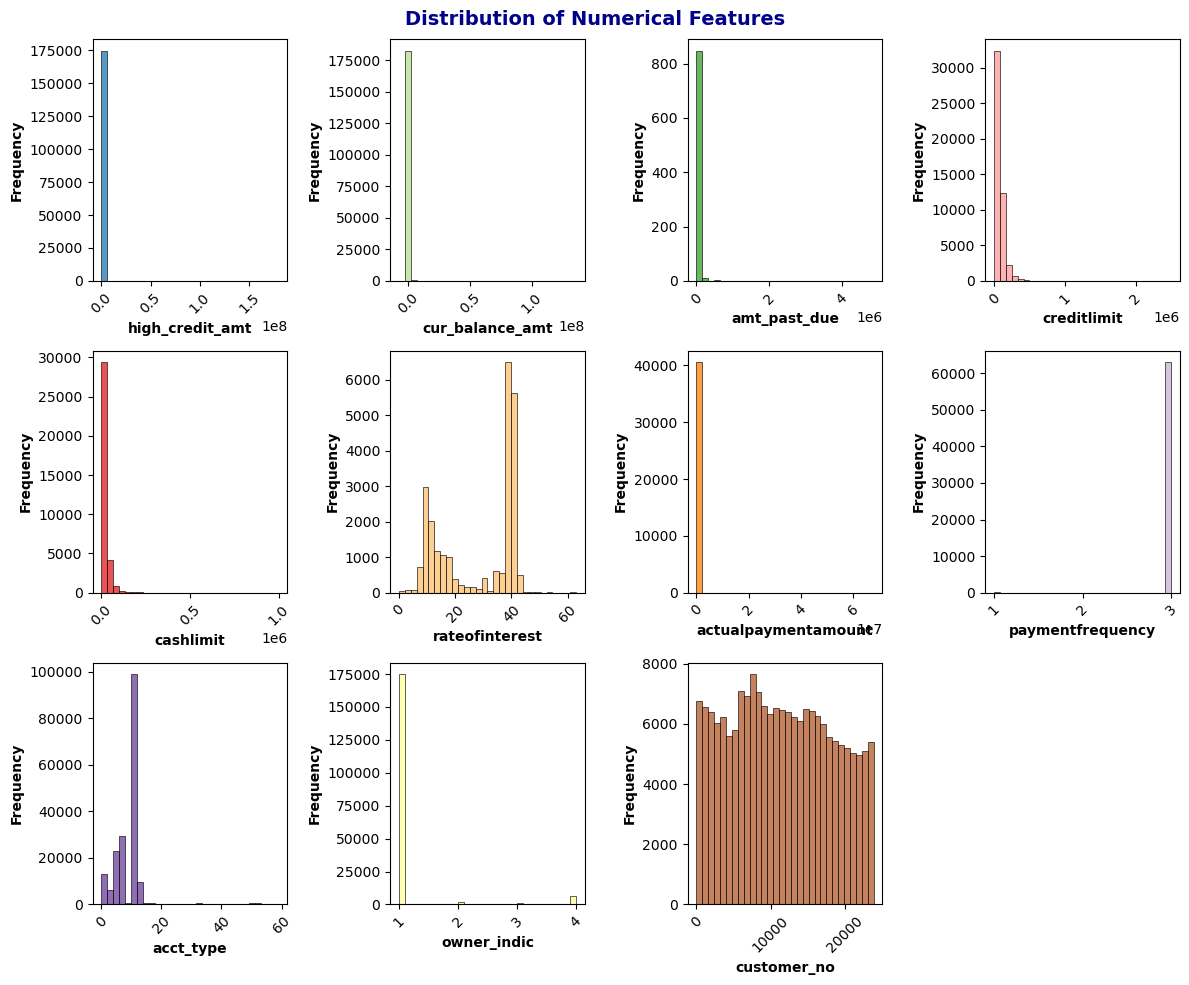

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
plot = 1  # Start subplot index

for col in numeric_columns:
    if plot <= len(numeric_columns):  # Ensure we don't exceed the available subplots
        ax = plt.subplot(3, 4, plot)

        # Assign a different color to each histogram dynamically
        color = plt.cm.Paired(plot / len(numeric_columns))  
        
        sns.histplot(cust_Account_df[col], bins=30, color=color, edgecolor='black')  
        
        plt.xlabel(col, fontsize=10, fontweight='bold', color='black')
        plt.ylabel('Frequency', fontsize=10, fontweight='bold', color='black')
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plot += 1

plt.suptitle('Distribution of Numerical Features', fontsize=14, fontweight='bold', color='darkblue')
plt.tight_layout()
plt.show()




In [24]:
print(cust_Account_df.columns)

Index(['dt_opened', 'customer_no', 'upload_dt', 'acct_type', 'owner_indic',
       'opened_dt', 'last_paymt_dt', 'closed_dt', 'reporting_dt',
       'high_credit_amt', 'cur_balance_amt', 'amt_past_due', 'paymenthistory1',
       'paymenthistory2', 'paymt_str_dt', 'paymt_end_dt', 'creditlimit',
       'cashlimit', 'rateofinterest', 'paymentfrequency',
       'actualpaymentamount'],
      dtype='object')


## Distribution Graph 

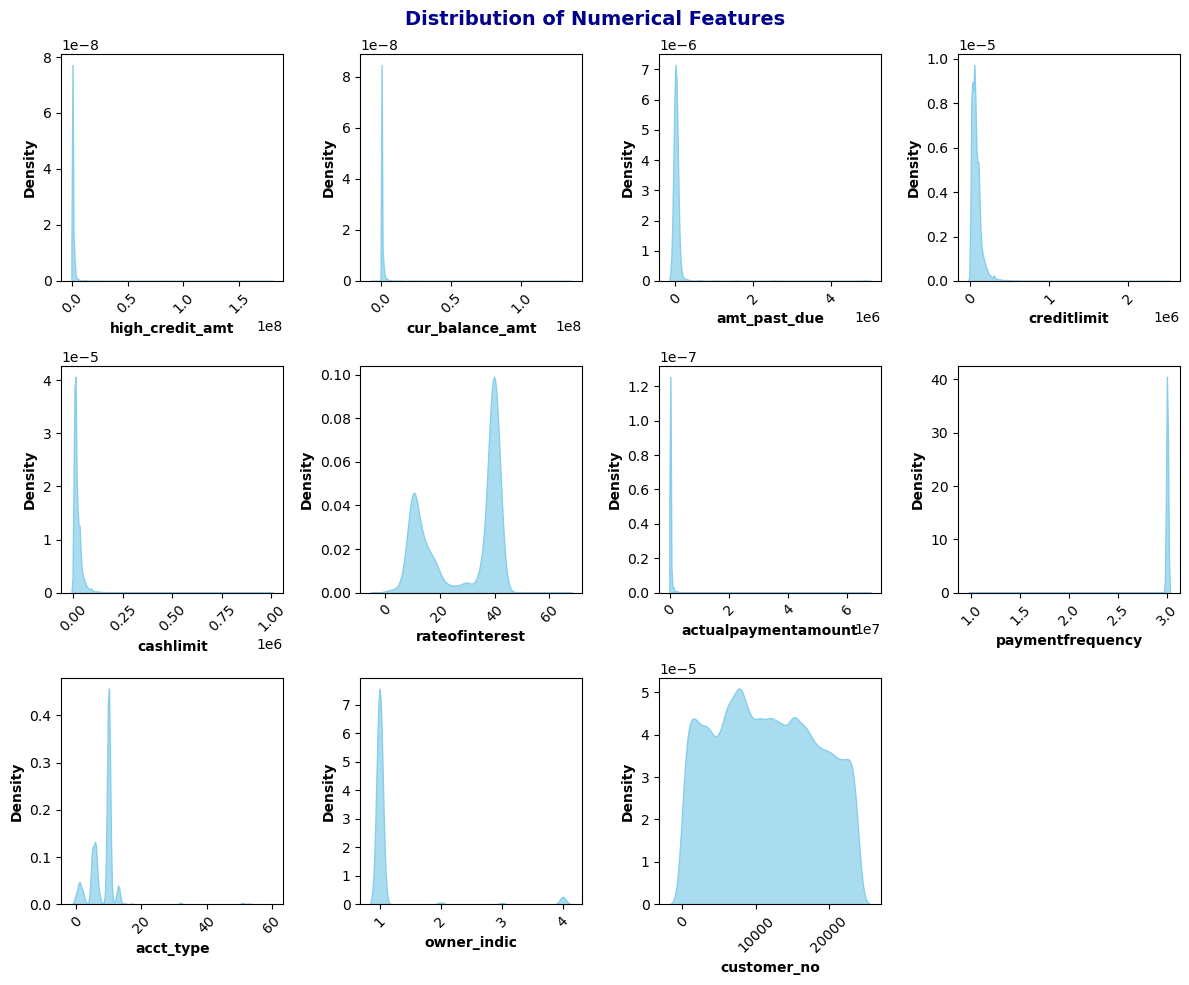

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
plot = 1  # Start subplot index

for col in numeric_columns:
    if plot <= len(numeric_columns):  # Ensure we don't exceed the available subplots
        ax = plt.subplot(3, 4, plot)
        
        # Use KDE for smoother distribution but sample data for faster processing
        sns.kdeplot(cust_Account_df[col], fill=True, color='skyblue', alpha=0.7)  
        
        plt.xlabel(col, fontsize=10, fontweight='bold', color='black')
        plt.ylabel('Density', fontsize=10, fontweight='bold', color='black')
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plot += 1

plt.suptitle('Distribution of Numerical Features', fontsize=14, fontweight='bold', color='darkblue')
plt.tight_layout()
plt.show()


## Histplot for datetime columns

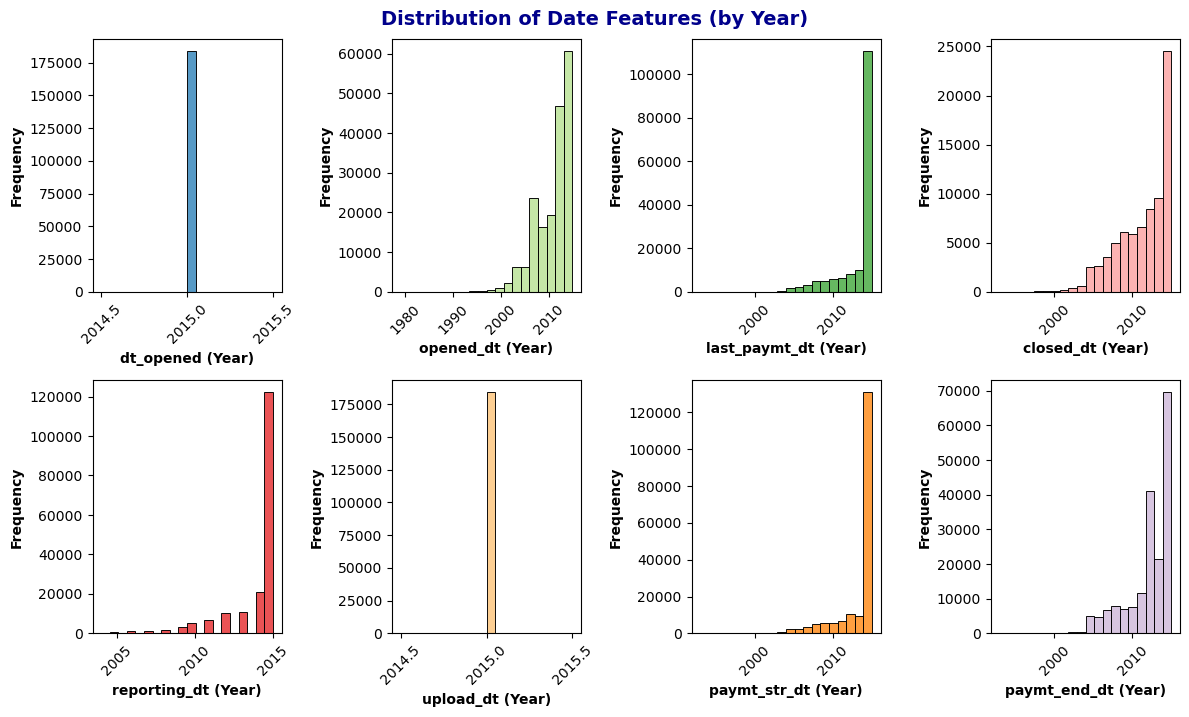

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
plot = 1  # Start subplot index
colors = plt.cm.Paired.colors  # Get a colormap with different colors

for col in date_columns:
    if plot <= len(date_columns):  # Ensure we don't exceed the available subplots
        ax = plt.subplot(3, 4, plot)
        
        # Assign a different color to each histogram
        color = colors[plot % len(colors)]
        
        # Extract the year for visualization
        sns.histplot(cust_Account_df[col].dt.year.dropna(), bins=20, kde=False, color=color, edgecolor='black')
        
        plt.xlabel(f'{col} (Year)', fontsize=10, fontweight='bold', color='black')
        plt.ylabel('Frequency', fontsize=10, fontweight='bold', color='black')
        plt.xticks(rotation=45)
        plot += 1

plt.suptitle('Distribution of Date Features (by Year)', fontsize=14, fontweight='bold', color='darkblue')
plt.tight_layout()
plt.show()


- 2015 had the most account openings, likely due to a campaign or policy change.
- 48% of accounts have zero balance, meaning loans are paid off or inactive.
- High credit amounts & balances are very skewed, with a few very high-value customers.
- Higher interest rates (-0.20 correlation) are given to riskier customers.
- Most payments happen monthly, showing disciplined financial behavior.
- Less than 1% of accounts have overdue payments, indicating responsible payers.
- Missing data: 74% of credit limits & 81% of cash limits, affecting risk analysis.
- 31 account types exist, but 2% are dormant/inactive.
- Higher credit limits strongly correlate (0.77, 0.72) with higher balances.

# Data Preprocessing for the Table cust_Account:

## Checking value count for each columns

In [27]:
cust_Account_df.apply(lambda col: print(f"======= {col.name} ========\n{col.value_counts()}\n"))

======= dt_opened ========
dt_opened
2015-11-16    4627
2015-12-21    2386
2015-08-18    2132
2015-10-13    2062
2015-10-26    1996
              ... 
2015-04-22      36
2015-04-18      18
2015-10-24       8
2015-04-16       2
2015-04-21       2
Name: count, Length: 197, dtype: int64

======= customer_no ========
customer_no
8814     76
11922    71
8872     68
51       66
18936    65
         ..
3257      1
20690     1
9396      1
5549      1
17698     1
Name: count, Length: 23896, dtype: int64

======= upload_dt ========
upload_dt
2015-04-21    4938
2015-10-23    3563
2015-07-16    3492
2015-10-20    3483
2015-08-20    3277
              ... 
2015-12-17    1026
2015-12-24     333
2015-12-28     106
2015-12-31      53
2015-11-29      36
Name: count, Length: 75, dtype: int64

======= acct_type ========
acct_type
10    99102
6     25252
5     22629
1      9291
13     8478
2      5577
7      4163
0      3891
12     1188
32      735
51      719
3       666
15      493
17      412
8       4

dt_opened              None
customer_no            None
upload_dt              None
acct_type              None
owner_indic            None
opened_dt              None
last_paymt_dt          None
closed_dt              None
reporting_dt           None
high_credit_amt        None
cur_balance_amt        None
amt_past_due           None
paymenthistory1        None
paymenthistory2        None
paymt_str_dt           None
paymt_end_dt           None
creditlimit            None
cashlimit              None
rateofinterest         None
paymentfrequency       None
actualpaymentamount    None
dtype: object

In [28]:
cust_Account_df

,dt_opened,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount
0,2015-11-10,12265,2015-10-20,6,1,2013-06-09,2014-06-30,2014-07-05,2015-09-30,20900.0,0,NaN,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",<NA>,2015-09-01,2014-07-01,NaN,NaN,NaN,NaN,NaN
1,2015-11-10,12265,2015-10-20,10,1,2012-05-25,2015-09-06,NaT,2015-10-03,16201.0,10390,NaN,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",2015-10-01,2012-11-01,14000.0,1400.0,NaN,3.0,5603.0
2,2015-11-10,12265,2015-10-20,10,1,2012-03-22,2015-08-31,NaT,2015-09-30,41028.0,34420,NaN,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",2015-09-01,2012-10-01,NaN,NaN,NaN,NaN,NaN
3,2015-07-20,15606,2015-07-09,10,1,2006-01-13,NaT,2007-07-26,2009-01-31,93473.0,0,NaN,"""""""1200900600600600300000000000000000000000000...",<NA>,2007-07-01,2006-02-01,NaN,NaN,NaN,NaN,NaN
4,2015-07-20,15606,2015-07-09,6,1,2015-01-18,2015-05-05,NaT,2015-05-31,20250.0,13500,NaN,"""""""000000000000000""""""",<NA>,2015-05-01,2015-01-01,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,2015-06-11,1611,2015-05-25,10,1,2007-05-02,2015-04-21,NaT,2015-04-30,24228.0,24228,NaN,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",2015-04-01,2012-05-01,NaN,NaN,NaN,NaN,NaN
186325,2015-06-11,1611,2015-05-25,10,1,2007-04-11,2009-06-22,2010-04-02,2015-04-30,19584.0,0,NaN,"""""""000179146119089058029000XXX""""""",<NA>,2010-04-01,2009-08-01,NaN,NaN,NaN,3.0,NaN
186326,2015-06-11,1611,2015-05-25,10,1,2006-11-20,NaT,2012-04-12,2013-12-31,50844.0,0,NaN,"""""""000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",<NA>,2012-04-01,2010-12-01,NaN,NaN,NaN,3.0,NaN
186327,2015-06-11,1611,2015-05-25,10,1,2006-10-17,NaT,2012-03-07,2015-04-15,35587.0,0,NaN,"""""""000010000000000000000000000000000XXXXXXXXXX...","""""""XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",2012-03-01,2009-04-01,15000.0,6000.0,NaN,3.0,NaN


In [29]:
cust_Account_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183928 entries, 0 to 186328
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dt_opened            183928 non-null  datetime64[ns]
 1   customer_no          183928 non-null  int64         
 2   upload_dt            183928 non-null  datetime64[ns]
 3   acct_type            183928 non-null  int64         
 4   owner_indic          183928 non-null  int64         
 5   opened_dt            183502 non-null  datetime64[ns]
 6   last_paymt_dt        158833 non-null  datetime64[ns]
 7   closed_dt            76153 non-null   datetime64[ns]
 8   reporting_dt         183928 non-null  datetime64[ns]
 9   high_credit_amt      175210 non-null  float64       
 10  cur_balance_amt      183928 non-null  int64         
 11  amt_past_due         865 non-null     float64       
 12  paymenthistory1      183928 non-null  object        
 13  paymenthistory2    

- Drop all date columns except "opened_dt" since they don’t impact the target.
- "owner_indic" is 98% '1', meaning most users operate their own accounts, making it unnecessary.
- "amt_past_due" has 99% missing values, so it doesn’t add useful information.
- "paymenthistory1" is repetitive and irrelevant, so it can be removed.
- "paymenthistory2" has 58% missing values, making it unreliable for analysis.
- "creditlimit" is missing in 74% of cases, so it lacks enough data for insights.
- "cashlimit" is missing in 81% of entries, making it unusable.
- "rateofinterest" has 87% missing values, so it’s not practical for modeling.
- "paymentfrequency" has 66% missing data, reducing its usefulness.
- "actualpaymentamount" is missing in 78% of cases, so it doesn’t add much value.
- Removing "owner_indic" improves dataset efficiency as it’s skewed, redundant, and has low business impact.

## Dropping Unwanted columns

In [30]:
data1=cust_Account_df[['owner_indic','amt_past_due','paymenthistory1','paymenthistory2','creditlimit',
              'cashlimit','rateofinterest','paymentfrequency','actualpaymentamount']]

In [31]:
cust_Account_df.drop(columns=data1,inplace=True,axis=1)

In [32]:
cust_Account_df

,dt_opened,customer_no,upload_dt,acct_type,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,paymt_str_dt,paymt_end_dt
0,2015-11-10,12265,2015-10-20,6,2013-06-09,2014-06-30,2014-07-05,2015-09-30,20900.0,0,2015-09-01,2014-07-01
1,2015-11-10,12265,2015-10-20,10,2012-05-25,2015-09-06,NaT,2015-10-03,16201.0,10390,2015-10-01,2012-11-01
2,2015-11-10,12265,2015-10-20,10,2012-03-22,2015-08-31,NaT,2015-09-30,41028.0,34420,2015-09-01,2012-10-01
3,2015-07-20,15606,2015-07-09,10,2006-01-13,NaT,2007-07-26,2009-01-31,93473.0,0,2007-07-01,2006-02-01
4,2015-07-20,15606,2015-07-09,6,2015-01-18,2015-05-05,NaT,2015-05-31,20250.0,13500,2015-05-01,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
186324,2015-06-11,1611,2015-05-25,10,2007-05-02,2015-04-21,NaT,2015-04-30,24228.0,24228,2015-04-01,2012-05-01
186325,2015-06-11,1611,2015-05-25,10,2007-04-11,2009-06-22,2010-04-02,2015-04-30,19584.0,0,2010-04-01,2009-08-01
186326,2015-06-11,1611,2015-05-25,10,2006-11-20,NaT,2012-04-12,2013-12-31,50844.0,0,2012-04-01,2010-12-01
186327,2015-06-11,1611,2015-05-25,10,2006-10-17,NaT,2012-03-07,2015-04-15,35587.0,0,2012-03-01,2009-04-01


In [33]:
cust_Account_df.isna().sum()

dt_opened               0
customer_no             0
upload_dt               0
acct_type               0
opened_dt             426
last_paymt_dt       25095
closed_dt          107775
reporting_dt            0
high_credit_amt      8718
cur_balance_amt         0
paymt_str_dt            1
paymt_end_dt            1
dtype: int64

### dropping this column because it has missing values more than 60 %

In [34]:
cust_Account_df.drop('closed_dt',axis=1,inplace=True)

In [35]:
cust_Account_df["high_credit_amt"] = cust_Account_df["high_credit_amt"].fillna(cust_Account_df["high_credit_amt"].median())

In [36]:
cust_Account_df

,dt_opened,customer_no,upload_dt,acct_type,opened_dt,last_paymt_dt,reporting_dt,high_credit_amt,cur_balance_amt,paymt_str_dt,paymt_end_dt
0,2015-11-10,12265,2015-10-20,6,2013-06-09,2014-06-30,2015-09-30,20900.0,0,2015-09-01,2014-07-01
1,2015-11-10,12265,2015-10-20,10,2012-05-25,2015-09-06,2015-10-03,16201.0,10390,2015-10-01,2012-11-01
2,2015-11-10,12265,2015-10-20,10,2012-03-22,2015-08-31,2015-09-30,41028.0,34420,2015-09-01,2012-10-01
3,2015-07-20,15606,2015-07-09,10,2006-01-13,NaT,2009-01-31,93473.0,0,2007-07-01,2006-02-01
4,2015-07-20,15606,2015-07-09,6,2015-01-18,2015-05-05,2015-05-31,20250.0,13500,2015-05-01,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...
186324,2015-06-11,1611,2015-05-25,10,2007-05-02,2015-04-21,2015-04-30,24228.0,24228,2015-04-01,2012-05-01
186325,2015-06-11,1611,2015-05-25,10,2007-04-11,2009-06-22,2015-04-30,19584.0,0,2010-04-01,2009-08-01
186326,2015-06-11,1611,2015-05-25,10,2006-11-20,NaT,2013-12-31,50844.0,0,2012-04-01,2010-12-01
186327,2015-06-11,1611,2015-05-25,10,2006-10-17,NaT,2015-04-15,35587.0,0,2012-03-01,2009-04-01


Now that all unwanted columns have been removed, we will proceed with dropping null values from the dataset.

### now dropping null values from table

In [37]:
cust_Account_df=cust_Account_df.dropna()


In [38]:
cust_Account_df.isnull().sum()

dt_opened          0
customer_no        0
upload_dt          0
acct_type          0
opened_dt          0
last_paymt_dt      0
reporting_dt       0
high_credit_amt    0
cur_balance_amt    0
paymt_str_dt       0
paymt_end_dt       0
dtype: int64

Here all the null values present in this table has been replaced 

In [39]:
cust_Account_df

,dt_opened,customer_no,upload_dt,acct_type,opened_dt,last_paymt_dt,reporting_dt,high_credit_amt,cur_balance_amt,paymt_str_dt,paymt_end_dt
0,2015-11-10,12265,2015-10-20,6,2013-06-09,2014-06-30,2015-09-30,20900.0,0,2015-09-01,2014-07-01
1,2015-11-10,12265,2015-10-20,10,2012-05-25,2015-09-06,2015-10-03,16201.0,10390,2015-10-01,2012-11-01
2,2015-11-10,12265,2015-10-20,10,2012-03-22,2015-08-31,2015-09-30,41028.0,34420,2015-09-01,2012-10-01
4,2015-07-20,15606,2015-07-09,6,2015-01-18,2015-05-05,2015-05-31,20250.0,13500,2015-05-01,2015-01-01
5,2015-07-20,15606,2015-07-09,6,2015-01-14,2015-05-02,2015-05-31,20000.0,8000,2015-05-01,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...
186321,2015-06-11,1611,2015-05-25,5,2008-04-29,2011-07-30,2011-07-31,130000.0,0,2011-07-01,2008-08-01
186322,2015-06-11,1611,2015-05-25,5,2007-10-08,2010-11-20,2010-11-30,75000.0,0,2010-11-01,2008-04-01
186323,2015-06-11,1611,2015-05-25,10,2007-05-30,2012-09-05,2014-02-28,29516.0,0,2012-09-01,2009-10-01
186324,2015-06-11,1611,2015-05-25,10,2007-05-02,2015-04-21,2015-04-30,24228.0,24228,2015-04-01,2012-05-01


### Now the data is cleaned fully and also the Date time type values are also changed 

# Importing the table Cust_Demographics:

In [40]:
Cust_Demographics_df

,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650,2,Card Setup,14,500000,,,,Y,IS1,,0,159,4284,4284,,1,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1,2,,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,,,,0,0,0,0,Mumbai,400059,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,,Y,State Bank of India,0,01-Jun-13,17-Jun-16,1,21,,Y,Y,N,,Y,1965-0,21,15,400610,0,2,90000,Nov-00,21,R,,,0000-00-00,0,98332XXXXX,1,N,0
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760,1,Card Setup,14,1200000,,,,Y,IS1,,0,91,B001,4077,,1,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1,2,,Bengaluru,560042,1969,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,17,,Y,Y,N,,Y,1969-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,99455XXXXX,1,N,0
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774,1,Card Setup,14,700000,,,,Y,IS1,,0,91,B001,4077,,2,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1,0,,Bengaluru,560042,1966,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AFAPNXXXXX,,,N,,0,,17-Jun-16,3,17,,N,Y,N,,Y,1966-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,98456XXXXX,1,N,0
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770,1,Card Setup,14,500000,,,,Y,IS1,,0,157,5107,5107,,1,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1,3,,Pune,411001,1988,0,Self,Y,2,100000,,,,0,0,0,0,Pune,411026,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,,Y,HDFC Bank,0,,17-Jun-16,1,21,,Y,Y,N,,Y,1988-0,21,16,411001,0,2,100000,Nov-00,21,R,,,6/15/65,1,98220XXXXX,1,N,0
4,06-May-15,5,30-Apr-15,Insignia,,,3,Card Setup,14,500000,,,,Y,IS1,,0,100,D016,4564,,1,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1,3,,Gurgaon,122009,1995,0,Self,Y,2,300000,,,,0,0,0,0,Gurgaon,122009,,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,13,,Y,Y,N,,Y,1995-0,13,3,122009,0,2,300000,Nov-00,13,R,,,0000-00-00,0,98111XXXXX,1,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23891,31-Dec-15,23892,10-Dec-15,Platinum Deligh,10-Dec-15,704,1,Card Setup,14,119000,,,,Y,PD1,PD3,12,SA05,MA01,,,1,CUQPSXXXXX,12-Oct-88,98715XXXXX,N,@YAHOO.COM,2,0,Graduate,New Delhi,110045,1988,10,Paren,Y,1,33000,Private Ltd. Co.,Others,SERVICE ASSOCIATE,2015,6,0,6,Gurgaon,122001,,PAN Card,CUQPSXXXXX,,,Y,State Bank of India,99000,01-Jan-15,17-Jun-16,1,10,Y,N,Y,N,,Y,1988-10,10,157,110045,0,1,33000,0-0,13,R,Y,,0000-00-00,0,XXXXX,1,N,0
23892,17-Dec-15,23893,16-Nov-15,Platinum Deligh,,,2,Card Setup,14,35000,,,,Y,PD1,PD3,12,SA03,AS33,,,1,DTPPSXXXXX,01-Feb-87,99101XXXXX,N,@GMAIL.COM,2,0,Graduate,New Delhi,110037,2014,12,Rente,N,1,1,Private Ltd. Co.,Others,ENGINEER,2012,12,3,0,New Delhi,110037,@GMAIL.COM,PAN Card,DTPPSXXXXX,,,N,,0,,17-Jun-16,1,10,N,N,Y,N,,Y,2014-12,33,102,282001,1,1,1,0-0,10,O,Y,,0000-00-00,0,99101XXXXX,1,N,0
23893,04-Nov-15,23894,24-Sep-15,Platinum Maxima,24-Sep-15,748,3,Card 

# Basic Checks:

In [41]:
Cust_Demographics_df.head()

,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650,2,Card Setup,14,500000,,,,Y,IS1,,0,159,4284,4284,,1,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1,2,,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,,,,0,0,0,0,Mumbai,400059,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,,Y,State Bank of India,0,01-Jun-13,17-Jun-16,1,21,,Y,Y,N,,Y,1965-0,21,15,400610,0,2,90000,Nov-00,21,R,,,0000-00-00,0,98332XXXXX,1,N,0
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760,1,Card Setup,14,1200000,,,,Y,IS1,,0,91,B001,4077,,1,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1,2,,Bengaluru,560042,1969,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,17,,Y,Y,N,,Y,1969-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,99455XXXXX,1,N,0
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774,1,Card Setup,14,700000,,,,Y,IS1,,0,91,B001,4077,,2,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1,0,,Bengaluru,560042,1966,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AFAPNXXXXX,,,N,,0,,17-Jun-16,3,17,,N,Y,N,,Y,1966-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,98456XXXXX,1,N,0
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770,1,Card Setup,14,500000,,,,Y,IS1,,0,157,5107,5107,,1,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1,3,,Pune,411001,1988,0,Self,Y,2,100000,,,,0,0,0,0,Pune,411026,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,,Y,HDFC Bank,0,,17-Jun-16,1,21,,Y,Y,N,,Y,1988-0,21,16,411001,0,2,100000,Nov-00,21,R,,,6/15/65,1,98220XXXXX,1,N,0
4,06-May-15,5,30-Apr-15,Insignia,,,3,Card Setup,14,500000,,,,Y,IS1,,0,100,D016,4564,,1,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1,3,,Gurgaon,122009,1995,0,Self,Y,2,300000,,,,0,0,0,0,Gurgaon,122009,,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,13,,Y,Y,N,,Y,1995-0,13,3,122009,0,2,300000,Nov-00,13,R,,,0000-00-00,0,98111XXXXX,1,N,0


### Checking for last five rows

In [42]:
Cust_Demographics_df.tail()

,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
23891,31-Dec-15,23892,10-Dec-15,Platinum Deligh,10-Dec-15,704,1,Card Setup,14,119000,,,,Y,PD1,PD3,12,SA05,MA01,,,1,CUQPSXXXXX,12-Oct-88,98715XXXXX,N,@YAHOO.COM,2,0,Graduate,New Delhi,110045,1988,10,Paren,Y,1,33000,Private Ltd. Co.,Others,SERVICE ASSOCIATE,2015,6,0,6,Gurgaon,122001,,PAN Card,CUQPSXXXXX,,,Y,State Bank of India,99000,01-Jan-15,17-Jun-16,1,10,Y,N,Y,N,,Y,1988-10,10,157,110045,0,1,33000,0-0,13,R,Y,,0000-00-00,0,XXXXX,1,N,0
23892,17-Dec-15,23893,16-Nov-15,Platinum Deligh,,,2,Card Setup,14,35000,,,,Y,PD1,PD3,12,SA03,AS33,,,1,DTPPSXXXXX,01-Feb-87,99101XXXXX,N,@GMAIL.COM,2,0,Graduate,New Delhi,110037,2014,12,Rente,N,1,1,Private Ltd. Co.,Others,ENGINEER,2012,12,3,0,New Delhi,110037,@GMAIL.COM,PAN Card,DTPPSXXXXX,,,N,,0,,17-Jun-16,1,10,N,N,Y,N,,Y,2014-12,33,102,282001,1,1,1,0-0,10,O,Y,,0000-00-00,0,99101XXXXX,1,N,0
23893,04-Nov-15,23894,24-Sep-15,Platinum Maxima,24-Sep-15,748,3,Card Setup,14,68000,,,,Y,PM1,,,CD01,D066,,,1,CPOPSXXXXX,08-Nov-86,99111XXXXX,Y,@GMAIL.COM,2,0,Graduate,New Delhi,110033,1986,0,Paren,Y,1,1,Private Ltd. Co.,Health Care,SENIOR ANALYST,2015,1,3,0,Gurgaon,122016,@ACCRETIVEHEALTH.COM,PAN Card,CPOPSXXXXX,,,Y,HDFC Bank,52000,01-Sep-14,17-Jun-16,1,10,,N,Y,N,,Y,1986-0,10,157,110033,0,1,1,0-0,13,R,,,0000-00-00,0,99111XXXXX,1,N,0
23894,03-Nov-15,23895,30-Sep-15,Platinum Deligh,30-Sep-15,740,3,Card Setup,14,158000,,,,Y,PD1,PD3,12,SA40,G011,,,1,AVZPGXXXXX,24-Nov-82,93100XXXXX,N,@GMAIL.COM,1,0,Graduate,New Delhi,110095,2010,0,Self,Y,2,25000,,,,0,0,0,0,New Delhi,110095,,PAN Card,AVZPGXXXXX,,,Y,Citibank N.A.,65000,01-Apr-14,17-Jun-16,2,10,,N,Y,N,,Y,2010-0,10,157,110095,0,2,25000,03-May,10,R,,,0000-00-00,0,93100XXXXX,1,N,0
23895,04-Dec-15,23896,06-Nov-15,Titanium Deligh,06-Nov-15,688,1,Card Setup,14,106000,,,,Y,TD1,,0,SA03,AS33,,,1,AJIPBXXXXX,15-Aug-83,97178XXXXX,N,@GMAIL.COM,1,0,Graduate,Ghaziabad,201005,2005,0,Paren,Y,2,1,,,,0,0,0,0,Ghaziabad,201005,,PAN Card,AJIPBXXXXX,,,Y,State Bank of India,106000,01-Feb-15,17-Jun-16,1,33,,N,Y,N,,Y,2005-0,33,41,201005,0,2,1,Aug-00,33,R,,,0000-00-00,0,97178XXXXX,1,N,0


### Checking for info

In [43]:
Cust_Demographics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 83 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   dt_opened    23896 non-null  object
 1   customer_no  23896 non-null  object
 2   entry_time   23896 non-null  object
 3   feature_1    23896 non-null  object
 4   feature_2    23896 non-null  object
 5   feature_3    23896 non-null  object
 6   feature_4    23896 non-null  object
 7   feature_5    23896 non-null  object
 8   feature_6    23896 non-null  object
 9   feature_7    23896 non-null  object
 10  feature_8    23896 non-null  object
 11  feature_9    23896 non-null  object
 12  feature_10   23896 non-null  object
 13  feature_11   23896 non-null  object
 14  feature_12   23896 non-null  object
 15  feature_13   23896 non-null  object
 16  feature_14   23896 non-null  object
 17  feature_15   23896 non-null  object
 18  feature_16   23896 non-null  object
 19  feature_17   23896 non-nu

### Checking for Statistical info

In [44]:
Cust_Demographics_df.describe()

,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
count,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896
unique,197,23896,297,8,282,263,4,2,2,485,20,20,8,3,17,15,3,365,523,303,13,3,10610,8463,3251,3,722,3,12,11,63,965,53,14,6,3,4,4334,10,12,5664,19,14,13,13,71,937,4473,6,11250,57,19,3,11,660,181,2,5,13,3,3,3,3,9,3,492,28,425,3013,3,4,4334,134,14,3,3,4,63,6,3124,4,3,2
top,16-Nov-15,1,19-Oct-15,Platinum Maxima,,,3,Card Setup,14,35000,,,,Y,PM1,,12,SA03,AS19,,,1,AXMPKXXXXX,01-Jan-85,99999XXXXX,N,@GMAIL.COM,1,0,Graduate,New Delhi,110059,2010,0,Self,Y,1,1,Private Ltd. Co.,Banking/Financial Services,,0,0,0,0,New Delhi,201301,,PAN Card,XXXXX,,,Y,,0,,17-Jun-16,1,10,,N,Y,N,,Y,2010-0,10,157,110059,0,1,1,0-0,10,R,,,0000-00-00,0,XXXXX,1,N,0
freq,699,1,180,9056,2836,2836,14593,23881,23881,797,22635,22635,23845,22611,8853,13004,10892,9331,1374,22869,23878,22701,16,33,194,21528,15595,18295,15503,14610,12539,1097,1839,21315,10833,19478,18214,8392,8677,13187,5682,5667,6344,5944,23181,9760,2320,13713,22796,94,18399,23792,12565,11422,11807,11610,23881,22693,12539,21503,23425,22611,23563,23887,23876,1670,10257,10257,944,19478,18214,8392,18235,9760,15617,20951,23879,23820,23817,2149,22958,23876,22892


# Data Preprocessing for cust_Demographics table:

In [45]:
Cust_Demographics_df.isnull().sum()

dt_opened      0
customer_no    0
entry_time     0
feature_1      0
feature_2      0
              ..
feature_76     0
feature_77     0
feature_78     0
feature_79     0
Bad_label      0
Length: 83, dtype: int64

This table does not contain any null values

## Checking for Duplicates

In [46]:
Cust_Demographics_df.duplicated().sum()

0

There are no duplicated values present in this table 

## Checking for unique values in each columns

In [47]:
import pandas as pd
# Replace it with the actual DataFrame you are working with

unique_values_dict = {col: Cust_Demographics_df[col].unique() for col in Cust_Demographics_df.columns}

for col, values in unique_values_dict.items():
    print(f"Unique values for column {col}: {values}")


Unique values for column dt_opened: ['18-Apr-15' '21-Apr-15' '22-Apr-15' '25-Apr-15' '06-May-15' '12-May-15'
 '22-May-15' '28-May-15' '30-May-15' '01-Jun-15' '04-Jun-15' '05-Jun-15'
 '19-Jun-15' '30-Jun-15' '02-Jul-15' '06-Jul-15' '22-Jul-15' '27-Jul-15'
 '29-Jul-15' '31-Jul-15' '05-Aug-15' '07-Aug-15' '11-Aug-15' '17-Jul-15'
 '22-Aug-15' '26-Aug-15' '28-Aug-15' '29-Aug-15' '09-Sep-15' '10-Sep-15'
 '14-Sep-15' '15-Sep-15' '19-Sep-15' '24-Sep-15' '05-Oct-15' '06-Oct-15'
 '09-Oct-15' '29-Oct-15' '30-Oct-15' '04-Nov-15' '05-Nov-15' '15-Jul-15'
 '27-Nov-15' '15-Dec-15' '17-Dec-15' '30-Dec-15' '17-Nov-15' '20-Oct-15'
 '21-Oct-15' '26-Oct-15' '28-Oct-15' '03-Nov-15' '10-Nov-15' '12-Nov-15'
 '21-Nov-15' '26-Nov-15' '30-Nov-15' '01-Dec-15' '21-Dec-15' '22-Dec-15'
 '24-Dec-15' '09-Dec-15' '16-Apr-15' '23-Apr-15' '24-Apr-15' '27-Apr-15'
 '28-Apr-15' '29-Apr-15' '30-Apr-15' '01-May-15' '02-May-15' '05-May-15'
 '07-May-15' '08-May-15' '11-May-15' '13-May-15' '14-May-15' '15-May-15'
 '16-May-15' '1

#### CALCULATE AND PRINT THE DISTRIBUTION OF THE TARGET VARIABLE

In [48]:
obs_0, obs_1 = Cust_Demographics_df["Bad_label"].value_counts()
total = Cust_Demographics_df.shape[0]

print(f"There are {obs_0:,} observations with Bad_label value 0, and {obs_1:,} with Bad_label value 1")
print(f"Bad_label 0 represents {obs_0/total*100:.2f}%, while Bad_label 1 represents {obs_1/total*100:.2f}%")


There are 22,892 observations with Bad_label value 0, and 1,004 with Bad_label value 1
Bad_label 0 represents 95.80%, while Bad_label 1 represents 4.20%


# Removal of unwanted columns:


In [49]:
Cust_Demographics_df.head()

,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650,2,Card Setup,14,500000,,,,Y,IS1,,0,159,4284,4284,,1,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1,2,,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,,,,0,0,0,0,Mumbai,400059,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,,Y,State Bank of India,0,01-Jun-13,17-Jun-16,1,21,,Y,Y,N,,Y,1965-0,21,15,400610,0,2,90000,Nov-00,21,R,,,0000-00-00,0,98332XXXXX,1,N,0
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760,1,Card Setup,14,1200000,,,,Y,IS1,,0,91,B001,4077,,1,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1,2,,Bengaluru,560042,1969,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,17,,Y,Y,N,,Y,1969-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,99455XXXXX,1,N,0
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774,1,Card Setup,14,700000,,,,Y,IS1,,0,91,B001,4077,,2,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1,0,,Bengaluru,560042,1966,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AFAPNXXXXX,,,N,,0,,17-Jun-16,3,17,,N,Y,N,,Y,1966-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,98456XXXXX,1,N,0
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770,1,Card Setup,14,500000,,,,Y,IS1,,0,157,5107,5107,,1,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1,3,,Pune,411001,1988,0,Self,Y,2,100000,,,,0,0,0,0,Pune,411026,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,,Y,HDFC Bank,0,,17-Jun-16,1,21,,Y,Y,N,,Y,1988-0,21,16,411001,0,2,100000,Nov-00,21,R,,,6/15/65,1,98220XXXXX,1,N,0
4,06-May-15,5,30-Apr-15,Insignia,,,3,Card Setup,14,500000,,,,Y,IS1,,0,100,D016,4564,,1,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1,3,,Gurgaon,122009,1995,0,Self,Y,2,300000,,,,0,0,0,0,Gurgaon,122009,,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,13,,Y,Y,N,,Y,1995-0,13,3,122009,0,2,300000,Nov-00,13,R,,,0000-00-00,0,98111XXXXX,1,N,0


entry_time = Likely a timestamp with no direct relevance to analysis (if dt_opened is already present).
These feature columns have generic names and do not provide meaningful insights based on the data sample.
If their values are mostly null, repetitive, or irrelevant, they add noise rather than value.
Without a clear definition of what these features represent, they are not useful for analysis.

### following features are not imp for model creation so we are removing that columns

In [50]:
data2=Cust_Demographics_df[['entry_time','feature_2','feature_4','feature_5','feature_6','feature_10','feature_15',
                        'feature_20','feature_21','feature_18','feature_22','feature_24','feature_45','feature_47','feature_49',
                        'feature_53','feature_54','feature_61','feature_63','feature_70','feature_75','feature_77']]

In [51]:
Cust_Demographics_df.drop(columns=data2,axis=1,inplace=True)

In [52]:
Cust_Demographics_df

,dt_opened,customer_no,feature_1,feature_3,feature_7,feature_8,feature_9,feature_11,feature_12,feature_13,feature_14,feature_16,feature_17,feature_19,feature_23,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_46,feature_48,feature_50,feature_51,feature_52,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_62,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_72,feature_73,feature_74,feature_76,feature_78,feature_79,Bad_label
0,18-Apr-15,1,Insignia,650,500000,,,Y,IS1,,0,4284,4284,1,N,1,2,,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,,,,0,0,0,0,Mumbai,400059,PAN Card,The Ratnakar Bank Ltd.,Y,State Bank of India,0,1,21,,Y,Y,N,Y,21,15,400610,0,2,90000,21,R,,,0,1,N,0
1,21-Apr-15,2,Insignia,760,1200000,,,Y,IS1,,0,B001,4077,1,N,1,2,,Bengaluru,560042,1969,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,PAN Card,The Ratnakar Bank Ltd.,N,,0,1,17,,Y,Y,N,Y,17,12,560042,0,2,1,17,R,,,0,1,N,0
2,22-Apr-15,3,Insignia,774,700000,,,Y,IS1,,0,B001,4077,2,N,1,0,,Bengaluru,560042,1966,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,PAN Card,,N,,0,3,17,,N,Y,N,Y,17,12,560042,0,2,1,17,R,,,0,1,N,0
3,25-Apr-15,4,Insignia,770,500000,,,Y,IS1,,0,5107,5107,1,N,1,3,,Pune,411001,1988,0,Self,Y,2,100000,,,,0,0,0,0,Pune,411026,PAN Card,The Ratnakar Bank Ltd.,Y,HDFC Bank,0,1,21,,Y,Y,N,Y,21,16,411001,0,2,100000,21,R,,,1,1,N,0
4,06-May-15,5,Insignia,,500000,,,Y,IS1,,0,D016,4564,1,N,1,3,,Gurgaon,122009,1995,0,Self,Y,2,300000,,,,0,0,0,0,Gurgaon,122009,PAN Card,The Ratnakar Bank Ltd.,N,,0,1,13,,Y,Y,N,Y,13,3,122009,0,2,300000,13,R,,,0,1,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23891,31-Dec-15,23892,Platinum Deligh,704,119000,,,Y,PD1,PD3,12,MA01,,1,N,2,0,Graduate,New Delhi,110045,1988,10,Paren,Y,1,33000,Private Ltd. Co.,Others,SERVICE ASSOCIATE,2015,6,0,6,Gurgaon,122001,PAN Card,,Y,State Bank of India,99000,1,10,Y,N,Y,N,Y,10,157,110045,0,1,33000,13,R,Y,,0,1,N,0
23892,17-Dec-15,23893,Platinum Deligh,,35000,,,Y,PD1,PD3,12,AS33,,1,N,2,0,Graduate,New Delhi,110037,2014,12,Rente,N,1,1,Private Ltd. Co.,Others,ENGINEER,2012,12,3,0,New Delhi,110037,PAN Card,,N,,0,1,10,N,N,Y,N,Y,33,102,282001,1,1,1,10,O,Y,,0,1,N,0
23893,04-Nov-15,23894,Platinum Maxima,748,68000,,,Y,PM1,,,D066,,1,Y,2,0,Graduate,New Delhi,110033,1986,0,Paren,Y,1,1,Private Ltd. Co.,Health Care,SENIOR ANALYST,2015,1,3,0,Gurgaon,122016,PAN Card,,Y,HDFC Bank,52000,1,10,,N,Y,N,Y,10,157,110033,0,1,1,13,R,,,0,1,N,0
23894,03-Nov-15,23895,Platinum Deligh,740,158000,,,Y,PD1,PD3,12,G011,,1,N,1,0,Graduate,New Delhi,110095,2010,0,Self,Y,2,25000,,,,0,0,0,0,New Delhi,110095,PAN Card,,Y,Citibank N.A.,65000,2,10,,N,Y,N,Y,10,157,110095,0,2,25000,10,R,,,0,1,N,0


In [53]:
Cust_Demographics_df.head(4)

,dt_opened,customer_no,feature_1,feature_3,feature_7,feature_8,feature_9,feature_11,feature_12,feature_13,feature_14,feature_16,feature_17,feature_19,feature_23,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_46,feature_48,feature_50,feature_51,feature_52,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_62,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_72,feature_73,feature_74,feature_76,feature_78,feature_79,Bad_label
0,18-Apr-15,1,Insignia,650,500000,,,Y,IS1,,0,4284,4284,1,N,1,2,,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,,,,0,0,0,0,Mumbai,400059,PAN Card,The Ratnakar Bank Ltd.,Y,State Bank of India,0,1,21,,Y,Y,N,Y,21,15,400610,0,2,90000,21,R,,,0,1,N,0
1,21-Apr-15,2,Insignia,760,1200000,,,Y,IS1,,0,B001,4077,1,N,1,2,,Bengaluru,560042,1969,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,PAN Card,The Ratnakar Bank Ltd.,N,,0,1,17,,Y,Y,N,Y,17,12,560042,0,2,1,17,R,,,0,1,N,0
2,22-Apr-15,3,Insignia,774,700000,,,Y,IS1,,0,B001,4077,2,N,1,0,,Bengaluru,560042,1966,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,PAN Card,,N,,0,3,17,,N,Y,N,Y,17,12,560042,0,2,1,17,R,,,0,1,N,0
3,25-Apr-15,4,Insignia,770,500000,,,Y,IS1,,0,5107,5107,1,N,1,3,,Pune,411001,1988,0,Self,Y,2,100000,,,,0,0,0,0,Pune,411026,PAN Card,The Ratnakar Bank Ltd.,Y,HDFC Bank,0,1,21,,Y,Y,N,Y,21,16,411001,0,2,100000,21,R,,,1,1,N,0


### Seperated categorical and numerical columns

In [54]:
cat_col=Cust_Demographics_df[['feature_1','feature_8','feature_9','feature_11','feature_12','feature_13','feature_16','feature_19',
                          'feature_23','feature_26','feature_28','feature_32','feature_33','feature_34','feature_36','feature_37',
                          'feature_38','feature_43','feature_46','feature_48','feature_50','feature_51','feature_57','feature_58','feature_59',
                          'feature_60','feature_62','feature_67','feature_72','feature_73','feature_74','feature_78','feature_79','Bad_label']]
num_col=Cust_Demographics_df[['customer_no','feature_3','feature_7','feature_14','feature_17','feature_27','feature_29','feature_30','feature_31',
                          'feature_35','feature_39','feature_40','feature_41','feature_42','feature_44','feature_52','feature_55','feature_56',
                          'feature_64','feature_65','feature_66','feature_68','feature_69','feature_71','feature_76']]

In [55]:
import pandas as pd

date_col_2 = ['dt_opened']
for i in date_col_2:
    Cust_Demographics_df[i] = pd.to_datetime(Cust_Demographics_df[i], errors='coerce')


In [56]:
Cust_Demographics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   dt_opened    23896 non-null  datetime64[ns]
 1   customer_no  23896 non-null  object        
 2   feature_1    23896 non-null  object        
 3   feature_3    23896 non-null  object        
 4   feature_7    23896 non-null  object        
 5   feature_8    23896 non-null  object        
 6   feature_9    23896 non-null  object        
 7   feature_11   23896 non-null  object        
 8   feature_12   23896 non-null  object        
 9   feature_13   23896 non-null  object        
 10  feature_14   23896 non-null  object        
 11  feature_16   23896 non-null  object        
 12  feature_17   23896 non-null  object        
 13  feature_19   23896 non-null  object        
 14  feature_23   23896 non-null  object        
 15  feature_25   23896 non-null  object        
 16  feat

Here the dt_opened is column is now changed into a datatype of datetime64

# Exploratory Data Analysis:

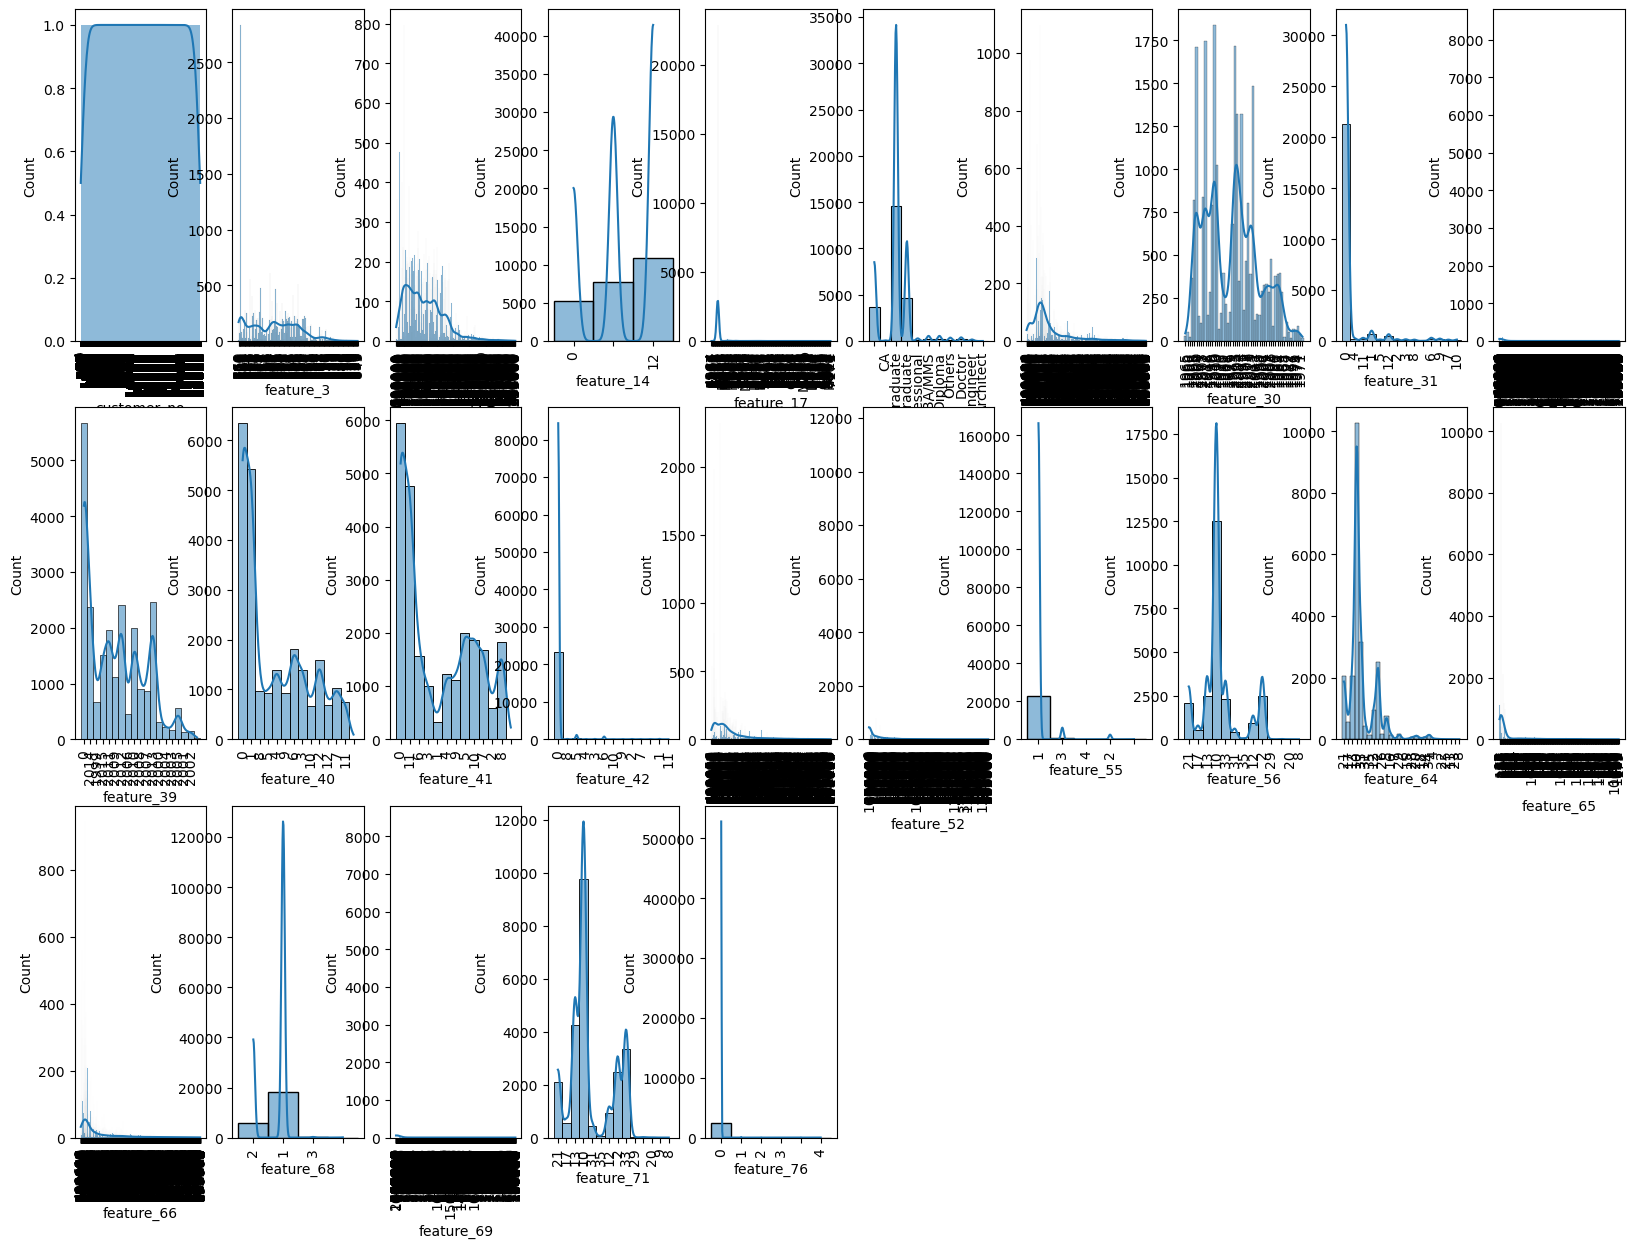

In [57]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in num_col:
    ax=plt.subplot(5,10,plotnumber)
    sns.histplot(x=num_col[column],kde=True)
    plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout
plt.show() 

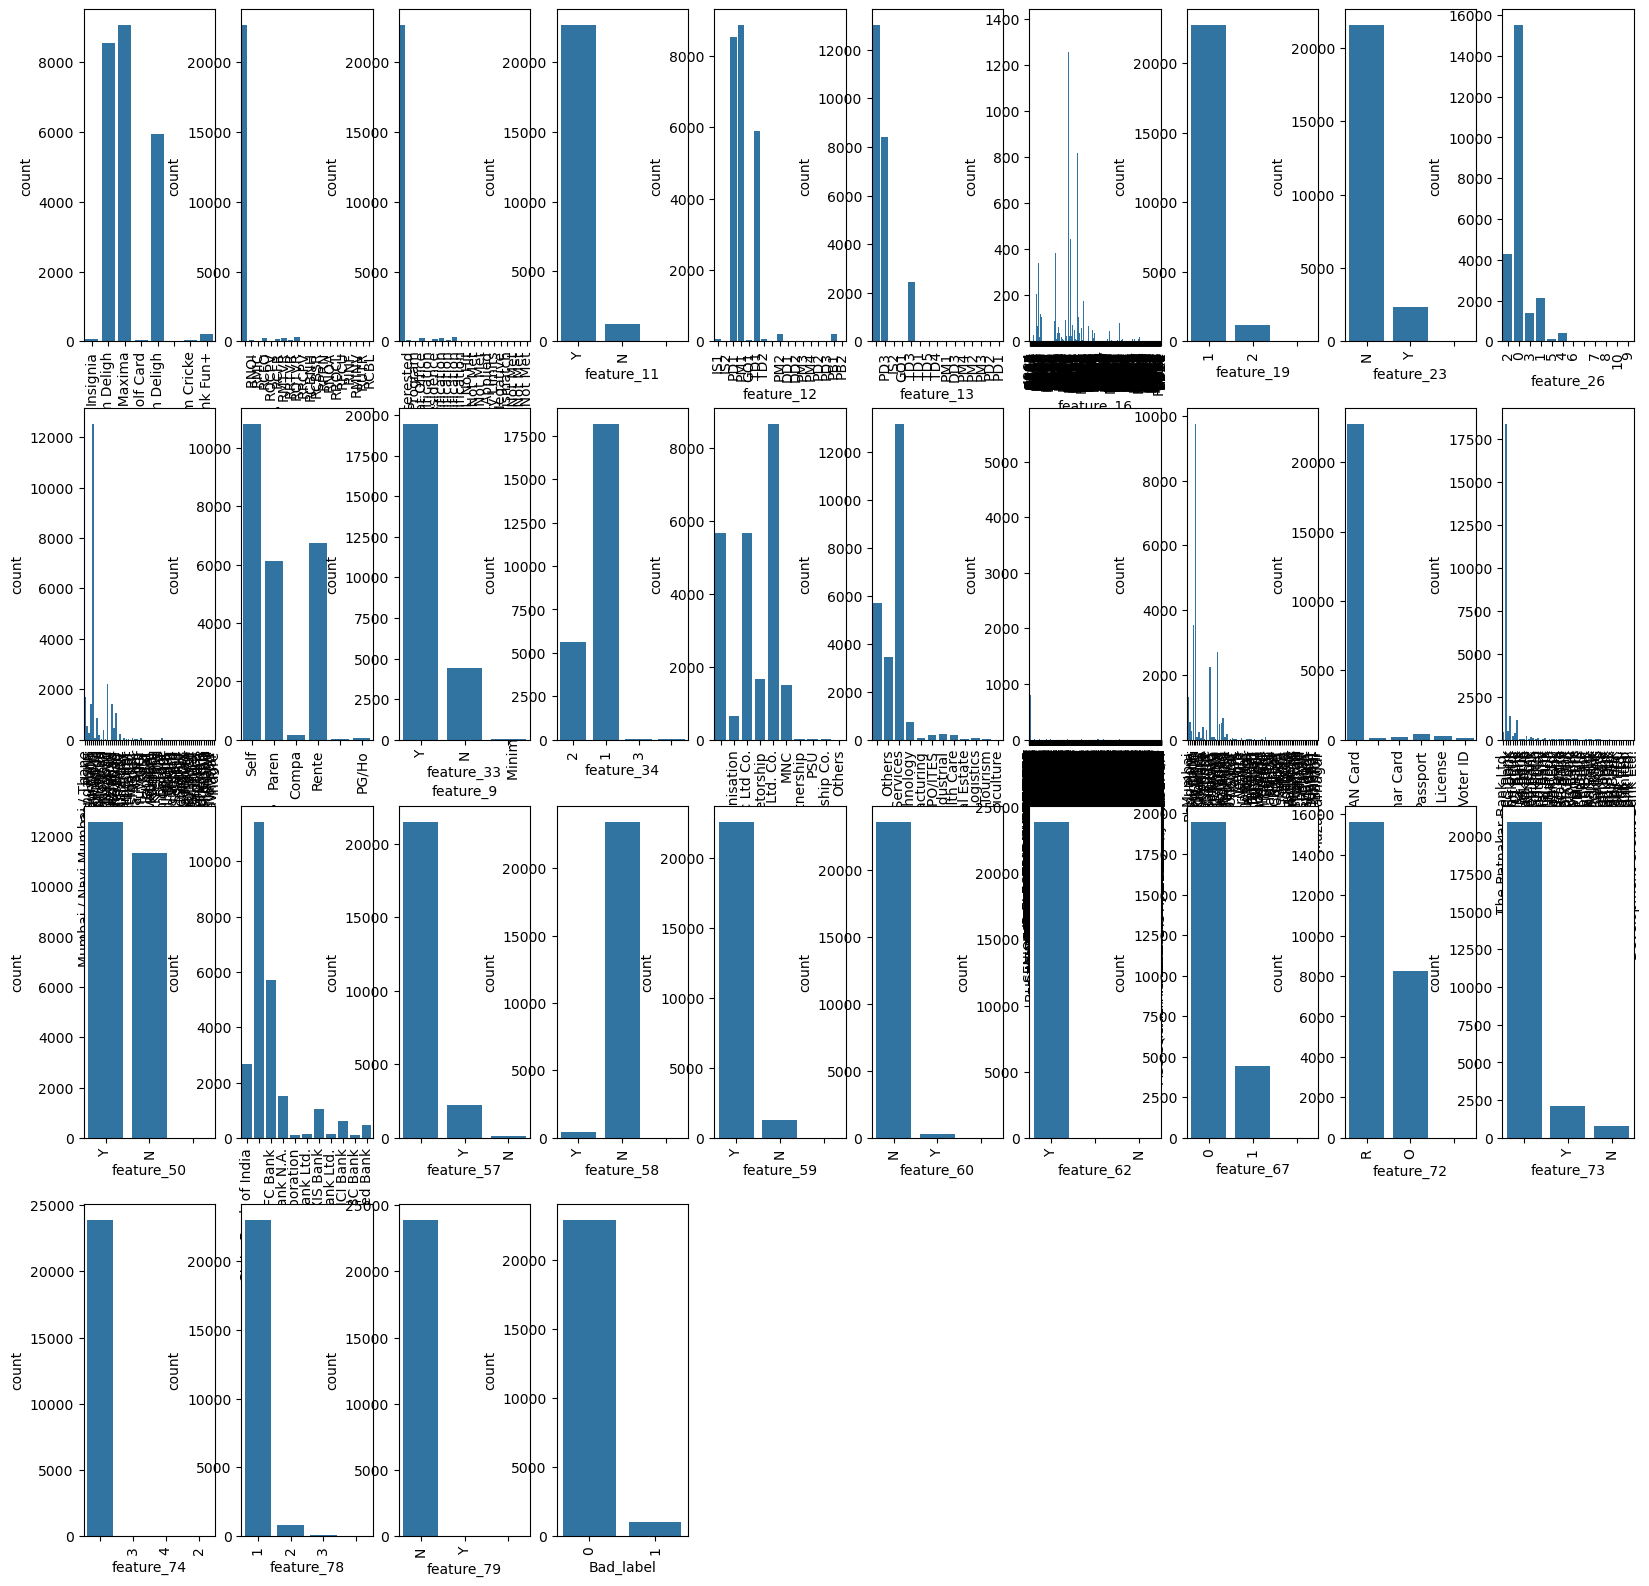

In [58]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in cat_col:
    ax=plt.subplot(5,10,plotnumber)
    sns.countplot(x=cat_col[column])
    plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout
plt.show()

- Feature_1: The most common value is Maxima.
- Feature_11: Y appears more often than N.
- Many customers are self-employed.
- The Technology sector has the most customers.
- PAN Card is the most used document for loan approval.
- Feature_74, Feature_78, and Feature_79 mostly contain Y.
- The Bad_Label column is mostly filled with 0.

Here all the columns are in the data type of object so we need to convert the numerical_column to a float or Integer data type

In [59]:
Cust_Demographics_df

,dt_opened,customer_no,feature_1,feature_3,feature_7,feature_8,feature_9,feature_11,feature_12,feature_13,feature_14,feature_16,feature_17,feature_19,feature_23,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_46,feature_48,feature_50,feature_51,feature_52,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_62,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_72,feature_73,feature_74,feature_76,feature_78,feature_79,Bad_label
0,2015-04-18,1,Insignia,650,500000,,,Y,IS1,,0,4284,4284,1,N,1,2,,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,,,,0,0,0,0,Mumbai,400059,PAN Card,The Ratnakar Bank Ltd.,Y,State Bank of India,0,1,21,,Y,Y,N,Y,21,15,400610,0,2,90000,21,R,,,0,1,N,0
1,2015-04-21,2,Insignia,760,1200000,,,Y,IS1,,0,B001,4077,1,N,1,2,,Bengaluru,560042,1969,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,PAN Card,The Ratnakar Bank Ltd.,N,,0,1,17,,Y,Y,N,Y,17,12,560042,0,2,1,17,R,,,0,1,N,0
2,2015-04-22,3,Insignia,774,700000,,,Y,IS1,,0,B001,4077,2,N,1,0,,Bengaluru,560042,1966,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,PAN Card,,N,,0,3,17,,N,Y,N,Y,17,12,560042,0,2,1,17,R,,,0,1,N,0
3,2015-04-25,4,Insignia,770,500000,,,Y,IS1,,0,5107,5107,1,N,1,3,,Pune,411001,1988,0,Self,Y,2,100000,,,,0,0,0,0,Pune,411026,PAN Card,The Ratnakar Bank Ltd.,Y,HDFC Bank,0,1,21,,Y,Y,N,Y,21,16,411001,0,2,100000,21,R,,,1,1,N,0
4,2015-05-06,5,Insignia,,500000,,,Y,IS1,,0,D016,4564,1,N,1,3,,Gurgaon,122009,1995,0,Self,Y,2,300000,,,,0,0,0,0,Gurgaon,122009,PAN Card,The Ratnakar Bank Ltd.,N,,0,1,13,,Y,Y,N,Y,13,3,122009,0,2,300000,13,R,,,0,1,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23891,2015-12-31,23892,Platinum Deligh,704,119000,,,Y,PD1,PD3,12,MA01,,1,N,2,0,Graduate,New Delhi,110045,1988,10,Paren,Y,1,33000,Private Ltd. Co.,Others,SERVICE ASSOCIATE,2015,6,0,6,Gurgaon,122001,PAN Card,,Y,State Bank of India,99000,1,10,Y,N,Y,N,Y,10,157,110045,0,1,33000,13,R,Y,,0,1,N,0
23892,2015-12-17,23893,Platinum Deligh,,35000,,,Y,PD1,PD3,12,AS33,,1,N,2,0,Graduate,New Delhi,110037,2014,12,Rente,N,1,1,Private Ltd. Co.,Others,ENGINEER,2012,12,3,0,New Delhi,110037,PAN Card,,N,,0,1,10,N,N,Y,N,Y,33,102,282001,1,1,1,10,O,Y,,0,1,N,0
23893,2015-11-04,23894,Platinum Maxima,748,68000,,,Y,PM1,,,D066,,1,Y,2,0,Graduate,New Delhi,110033,1986,0,Paren,Y,1,1,Private Ltd. Co.,Health Care,SENIOR ANALYST,2015,1,3,0,Gurgaon,122016,PAN Card,,Y,HDFC Bank,52000,1,10,,N,Y,N,Y,10,157,110033,0,1,1,13,R,,,0,1,N,0
23894,2015-11-03,23895,Platinum Deligh,740,158000,,,Y,PD1,PD3,12,G011,,1,N,1,0,Graduate,New Delhi,110095,2010,0,Self,Y,2,25000,,,,0,0,0,0,New Delhi,110095,PAN Card,,Y,Citibank N.A.,65000,2,10,,N,Y,N,Y,10,157,110095,0,2,25000,10,R,,,0,1,N,0


### Checking for null values

In [60]:
nan_rows = num_col[num_col.isna().any(axis=1)]
print("Rows with NaN values:", nan_rows)

Rows with NaN values: Empty DataFrame
Columns: [customer_no, feature_3, feature_7, feature_14, feature_17, feature_27, feature_29, feature_30, feature_31, feature_35, feature_39, feature_40, feature_41, feature_42, feature_44, feature_52, feature_55, feature_56, feature_64, feature_65, feature_66, feature_68, feature_69, feature_71, feature_76]
Index: []


In [61]:
nan_percentage_all_columns = (Cust_Demographics_df.isna().sum() / len(Cust_Demographics_df)) * 100
print("Percentage of NaN values in each column:")
print(nan_percentage_all_columns)

Percentage of NaN values in each column:
dt_opened      0.0
customer_no    0.0
feature_1      0.0
feature_3      0.0
feature_7      0.0
              ... 
feature_74     0.0
feature_76     0.0
feature_78     0.0
feature_79     0.0
Bad_label      0.0
Length: 61, dtype: float64


Here there are very few amount of nan values present in each column. So, we will remove the NaN Values present in this Table

## Filling null values

In [62]:
Cust_Demographics_df.filled=Cust_Demographics_df.fillna(0)

In [63]:
## Converting categorical to Numerial 

In [64]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

In [65]:
# Iterate through each column in the DataFrame
for column in Cust_Demographics_df.columns:
    # Check if the column has object dtype (categorical)
    if Cust_Demographics_df[column].dtype == 'object':
        # Fit and transform the LabelEncoder for each categorical column
        Cust_Demographics_df[column] = lc.fit_transform(Cust_Demographics_df[column])

In [66]:
Cust_Demographics_df

,dt_opened,customer_no,feature_1,feature_3,feature_7,feature_8,feature_9,feature_11,feature_12,feature_13,feature_14,feature_16,feature_17,feature_19,feature_23,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_46,feature_48,feature_50,feature_51,feature_52,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_62,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_72,feature_73,feature_74,feature_76,feature_78,feature_79,Bad_label
0,2015-04-18,0,2,41,401,0,0,2,4,0,1,42,103,1,1,1,4,0,40,410,2,1,5,2,2,4236,0,0,0,1,1,1,1,44,366,3,51,2,10,1,1,7,0,2,2,1,2,12,49,1467,1,2,4236,7,2,0,0,1,1,1,0
1,2015-04-21,11111,2,151,29,0,0,2,4,0,1,147,93,1,1,1,4,0,10,717,6,1,5,2,2,1,0,0,0,1,1,1,1,7,729,3,51,1,0,1,1,4,0,2,2,1,2,8,22,2005,1,2,1,4,2,0,0,1,1,1,0
2,2015-04-22,16119,2,165,442,0,0,2,4,0,1,147,93,2,1,1,1,0,10,717,3,1,5,2,2,1,0,0,0,1,1,1,1,7,729,3,0,1,0,1,3,4,0,1,2,1,2,8,22,2005,1,2,1,4,2,0,0,1,1,1,0
3,2015-04-25,17230,2,161,401,0,0,2,4,0,1,57,154,1,1,1,5,0,46,445,25,1,5,2,2,4,0,0,0,1,1,1,1,52,474,3,51,2,4,1,1,7,0,2,2,1,2,12,58,1504,1,2,4,7,2,0,0,2,1,1,0
4,2015-05-06,18341,2,0,401,0,0,2,4,0,1,184,122,1,1,1,5,0,24,123,32,1,5,2,2,1144,0,0,0,1,1,1,1,29,127,3,51,1,0,1,1,3,0,2,2,1,2,4,139,126,1,2,1144,3,2,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23891,2015-12-31,15437,4,95,27,0,0,2,8,6,2,361,0,1,1,2,1,6,43,45,25,3,3,2,1,1551,7,8,4077,18,10,1,9,29,119,3,0,2,10,659,1,1,2,1,2,1,2,1,55,45,1,1,1551,3,2,2,0,1,1,1,0
23892,2015-12-17,15438,4,0,267,0,0,2,8,6,2,140,0,1,1,2,1,6,43,37,51,5,4,1,1,1,7,8,1679,15,5,6,1,48,38,3,0,1,0,1,1,1,1,1,2,1,2,20,5,1102,2,1,1,1,1,2,0,1,1,1,0
23893,2015-11-04,15439,5,139,439,0,0,2,11,0,0,198,0,1,2,2,1,6,43,33,23,1,3,2,1,1,7,3,3917,18,2,6,1,29,133,3,0,2,4,490,1,1,0,1,2,1,2,1,55,33,1,1,1,3,2,0,0,1,1,1,0
23894,2015-11-03,15440,4,131,69,0,0,2,8,6,2,269,0,1,1,1,1,6,43,93,47,1,5,2,2,425,0,0,0,1,1,1,1,48,94,3,0,2,3,563,2,1,0,1,2,1,2,1,55,93,1,2,425,1,2,0,0,1,1,1,0


All values in this table have been converted to numbers, and any missing (NaN) values have been filled.

## Checking For info

In [67]:
Cust_Demographics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   dt_opened    23896 non-null  datetime64[ns]
 1   customer_no  23896 non-null  int32         
 2   feature_1    23896 non-null  int32         
 3   feature_3    23896 non-null  int32         
 4   feature_7    23896 non-null  int32         
 5   feature_8    23896 non-null  int32         
 6   feature_9    23896 non-null  int32         
 7   feature_11   23896 non-null  int32         
 8   feature_12   23896 non-null  int32         
 9   feature_13   23896 non-null  int32         
 10  feature_14   23896 non-null  int32         
 11  feature_16   23896 non-null  int32         
 12  feature_17   23896 non-null  int32         
 13  feature_19   23896 non-null  int32         
 14  feature_23   23896 non-null  int32         
 15  feature_25   23896 non-null  int32         
 16  feat

- The "dt_opened" column records when a customer’s account was created. Since this detail is already in Table_1, we can remove it from Table_2 to avoid duplication.

- The "customer_no" column uniquely identifies each customer and helps connect different tables.

- The "feature_1" column represents various credit card types. The most popular are 'Platinum Maxima' (9,056 customers) and 'Platinum Delight' (8,541 customers).

- The 'Titanium Delight' card is also widely used, with 5,943 customers.

- Less common credit cards include 'RBL Fun' (218 customers), 'Insignia' (67 customers), 'Golf Card' (30 customers), and 'Platinum Cricket' (26 customers).

# Fetching the Table Cust_Enquiry:

In [68]:
Cust_Enquiry_df

,dt_opened,customer_no,upload_dt,enquiry_dt,enq_purpose,enq_amt
0,18-Apr-15,1,21-Apr-15,19-Dec-14,2,3500000
1,18-Apr-15,1,21-Apr-15,05-Mar-14,5,500000
2,18-Apr-15,1,21-Apr-15,05-Mar-14,0,50000
3,18-Apr-15,1,21-Apr-15,22-Feb-14,10,50000
4,18-Apr-15,1,21-Apr-15,11-Jun-13,10,1000
...,...,...,...,...,...,...
413183,04-Dec-15,23896,09-Nov-15,22-Oct-11,5,200000
413184,04-Dec-15,23896,09-Nov-15,06-Jan-11,10,50000
413185,04-Dec-15,23896,09-Nov-15,01-Apr-10,10,50000
413186,04-Dec-15,23896,09-Nov-15,21-Feb-10,1,330000


# Basic checks:

In [69]:
Cust_Enquiry_df.head()

,dt_opened,customer_no,upload_dt,enquiry_dt,enq_purpose,enq_amt
0,18-Apr-15,1,21-Apr-15,19-Dec-14,2,3500000
1,18-Apr-15,1,21-Apr-15,05-Mar-14,5,500000
2,18-Apr-15,1,21-Apr-15,05-Mar-14,0,50000
3,18-Apr-15,1,21-Apr-15,22-Feb-14,10,50000
4,18-Apr-15,1,21-Apr-15,11-Jun-13,10,1000


## Checking last five rows

In [70]:
Cust_Enquiry_df.tail()

,dt_opened,customer_no,upload_dt,enquiry_dt,enq_purpose,enq_amt
413183,04-Dec-15,23896,09-Nov-15,22-Oct-11,5,200000
413184,04-Dec-15,23896,09-Nov-15,06-Jan-11,10,50000
413185,04-Dec-15,23896,09-Nov-15,01-Apr-10,10,50000
413186,04-Dec-15,23896,09-Nov-15,21-Feb-10,1,330000
413187,04-Dec-15,23896,09-Nov-15,17-Oct-07,2,682000


## Checking for info

In [71]:
Cust_Enquiry_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413188 entries, 0 to 413187
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   dt_opened    413188 non-null  object
 1   customer_no  413188 non-null  object
 2   upload_dt    413188 non-null  object
 3   enquiry_dt   413188 non-null  object
 4   enq_purpose  413188 non-null  object
 5   enq_amt      413188 non-null  object
dtypes: object(6)
memory usage: 18.9+ MB


## Checking for statistical info

In [72]:
Cust_Enquiry_df.describe()

,dt_opened,customer_no,upload_dt,enquiry_dt,enq_purpose,enq_amt
count,413188,413188,413188,413188,413188,413188
unique,197,23896,76,3772,37,7384
top,16-Nov-15,10076,21-Apr-15,17-Mar-15,10,50000
freq,10538,308,11770,495,238150,79949


# EDA:

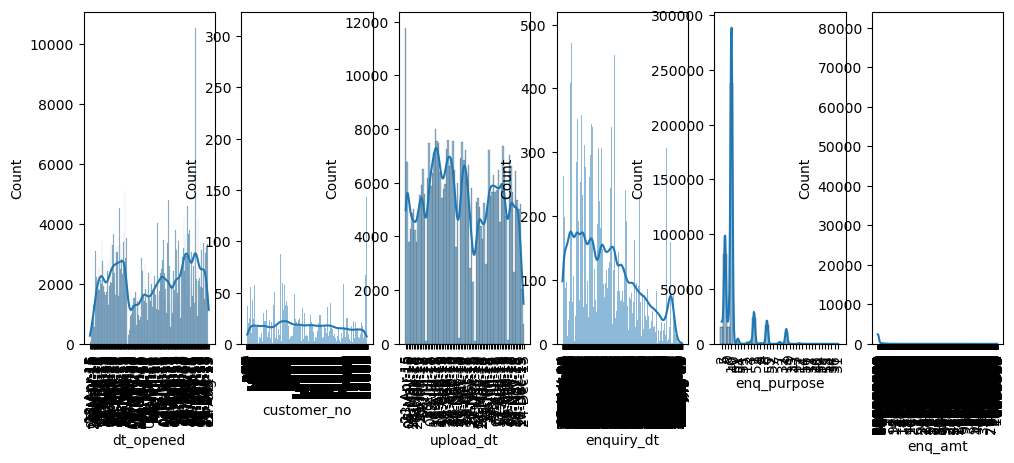

In [73]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in Cust_Enquiry_df:
    ax=plt.subplot(5,10,plotnumber)
    sns.histplot(x=Cust_Enquiry_df[column],kde=True)
    plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout
plt.show()

# Insights from the Graph and from the Table:

- The "Cust_Enquiry" table has six columns: "dt_opened," "customer_no," "upload_dt," "enquiry_dt," "enq_purpose," and "enq_amt." This table records customer inquiries.

- The columns "dt_opened" and "upload_dt" contain dates, which are not needed since "dt_opened" is already in other tables.

- The remaining columns store customer inquiries, which are not useful for predicting the target class.

- Since this table does not add value to the analysis, we can drop it.

# Domain Analysis:

- Customer Account Data (Cust_Account): This table has a customer’s past account and payment history.

- Customer Enquiry Data (Cust_Enquiry): This table records customer inquiries, including the amount and purpose.

- Demographics Data (Cust_Demographics): This table has details of current customer applications and their demographics.

- min_months_last_30_plus: The shortest time before a customer’s account had a 30+ days overdue payment.

- mean_diff_open_enquiry_dt: The average time between when an account was opened and when an inquiry was made.

# Insights:

* Most people prefer to make payments twice.
- In Feature 40, most people fall into category 0.
- The most common value in "paymenthistory2" is a long string of zeros.
- "Platinum Maxima" is the most popular choice in Feature 1, with 74,870 people selecting it.
- In Feature 9, most people chose "Negative Office Tele Verification."
- Most transactions are made by graduates.
- New Delhi has the highest number of people.
- Most people making transactions are self-employed.
- The majority come from the Banking/Financial Services sector.








### Data Analysis for all tables have been completed, So now we need to merge the required tables to form our final table.

In [74]:
# Merge tables using 'customer_no' as the common column
df_merged = cust_Account_df.merge(Cust_Demographics_df, on='customer_no', how='inner')

In [75]:
df_merged


,dt_opened_x,customer_no,upload_dt,acct_type,opened_dt,last_paymt_dt,reporting_dt,high_credit_amt,cur_balance_amt,paymt_str_dt,paymt_end_dt,dt_opened_y,feature_1,feature_3,feature_7,feature_8,feature_9,feature_11,feature_12,feature_13,feature_14,feature_16,feature_17,feature_19,feature_23,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_46,feature_48,feature_50,feature_51,feature_52,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_62,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_72,feature_73,feature_74,feature_76,feature_78,feature_79,Bad_label
0,2015-11-10,12265,2015-10-20,6,2013-06-09,2014-06-30,2015-09-30,20900.0,0,2015-09-01,2014-07-01,2015-11-10,4,0,214,0,0,2,8,6,2,207,0,1,2,1,1,6,43,79,21,1,5,2,2,1,0,0,0,1,1,1,1,48,80,3,0,1,0,1,1,1,0,1,2,1,2,1,55,79,1,2,1,1,2,0,0,1,1,1,1
1,2015-11-10,12265,2015-10-20,10,2012-05-25,2015-09-06,2015-10-03,16201.0,10390,2015-10-01,2012-11-01,2015-11-10,4,0,214,0,0,2,8,6,2,207,0,1,2,1,1,6,43,79,21,1,5,2,2,1,0,0,0,1,1,1,1,48,80,3,0,1,0,1,1,1,0,1,2,1,2,1,55,79,1,2,1,1,2,0,0,1,1,1,1
2,2015-11-10,12265,2015-10-20,10,2012-03-22,2015-08-31,2015-09-30,41028.0,34420,2015-09-01,2012-10-01,2015-11-10,4,0,214,0,0,2,8,6,2,207,0,1,2,1,1,6,43,79,21,1,5,2,2,1,0,0,0,1,1,1,1,48,80,3,0,1,0,1,1,1,0,1,2,1,2,1,55,79,1,2,1,1,2,0,0,1,1,1,1
3,2015-07-20,15606,2015-07-09,6,2015-01-18,2015-05-05,2015-05-31,20250.0,13500,2015-05-01,2015-01-01,2015-07-03,7,118,11,0,0,2,15,0,1,288,0,1,1,1,4,0,26,568,49,1,3,2,1,2572,7,2,4144,12,9,4,1,32,588,3,0,2,9,476,1,5,0,1,2,1,2,10,40,1745,1,1,2572,5,2,0,0,1,1,1,0
4,2015-07-20,15606,2015-07-09,6,2015-01-14,2015-05-02,2015-05-31,20000.0,8000,2015-05-01,2015-01-01,2015-07-03,7,118,11,0,0,2,15,0,1,288,0,1,1,1,4,0,26,568,49,1,3,2,1,2572,7,2,4144,12,9,4,1,32,588,3,0,2,9,476,1,5,0,1,2,1,2,10,40,1745,1,1,2572,5,2,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158755,2015-06-11,1611,2015-05-25,5,2008-04-29,2011-07-30,2011-07-31,130000.0,0,2011-07-01,2008-08-01,2015-10-27,5,256,324,0,0,2,11,0,1,200,0,1,1,1,1,0,43,32,1,1,3,2,1,185,9,2,1370,9,3,4,1,49,173,3,23,1,0,1,1,1,0,1,2,1,2,1,55,32,1,1,185,10,1,0,0,1,1,1,0
158756,2015-06-11,1611,2015-05-25,5,2007-10-08,2010-11-20,2010-11-30,75000.0,0,2010-11-01,2008-04-01,2015-10-27,5,256,324,0,0,2,11,0,1,200,0,1,1,1,1,0,43,32,1,1,3,2,1,185,9,2,1370,9,3,4,1,49,173,3,23,1,0,1,1,1,0,1,2,1,2,1,55,32,1,1,185,10,1,0,0,1,1,1,0
158757,2015-06-11,1611,2015-05-25,10,2007-05-30,2012-09-05,2014-02-28,29516.0,0,2012-09-01,2009-10-01,2015-10-27,5,256,324,0,0,2,11,0,1,200,0,1,1,1,1,0,43,32,1,1,3,2,1,185,9,2,1370,9,3,4,1,49,173,3,23,1,0,1,1,1,0,1,2,1,2,1,55,32,1,1,185,10,1,0,0,1,1,1,0
158758,2015-06-11,1611,2015-05-25,10,2007-05-02,2015-04-21,2015-04-30,24228.0,24228,2015-04-01,2012-05-01,2015-10-27,5,256,324,0,0,2,11,0,1,200,0,1,1,1,1,0,43,32,1,1,3,2,1,185,9,2,1370,9,3,4,1,49,173,3,23,1,0,1,1,1,0,1,2,1,2,1,55,32,1,1,185,10,1,0,0,1,1,1,0


In [76]:
df=df_merged.copy()

In [77]:
df

,dt_opened_x,customer_no,upload_dt,acct_type,opened_dt,last_paymt_dt,reporting_dt,high_credit_amt,cur_balance_amt,paymt_str_dt,paymt_end_dt,dt_opened_y,feature_1,feature_3,feature_7,feature_8,feature_9,feature_11,feature_12,feature_13,feature_14,feature_16,feature_17,feature_19,feature_23,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_46,feature_48,feature_50,feature_51,feature_52,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_62,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_72,feature_73,feature_74,feature_76,feature_78,feature_79,Bad_label
0,2015-11-10,12265,2015-10-20,6,2013-06-09,2014-06-30,2015-09-30,20900.0,0,2015-09-01,2014-07-01,2015-11-10,4,0,214,0,0,2,8,6,2,207,0,1,2,1,1,6,43,79,21,1,5,2,2,1,0,0,0,1,1,1,1,48,80,3,0,1,0,1,1,1,0,1,2,1,2,1,55,79,1,2,1,1,2,0,0,1,1,1,1
1,2015-11-10,12265,2015-10-20,10,2012-05-25,2015-09-06,2015-10-03,16201.0,10390,2015-10-01,2012-11-01,2015-11-10,4,0,214,0,0,2,8,6,2,207,0,1,2,1,1,6,43,79,21,1,5,2,2,1,0,0,0,1,1,1,1,48,80,3,0,1,0,1,1,1,0,1,2,1,2,1,55,79,1,2,1,1,2,0,0,1,1,1,1
2,2015-11-10,12265,2015-10-20,10,2012-03-22,2015-08-31,2015-09-30,41028.0,34420,2015-09-01,2012-10-01,2015-11-10,4,0,214,0,0,2,8,6,2,207,0,1,2,1,1,6,43,79,21,1,5,2,2,1,0,0,0,1,1,1,1,48,80,3,0,1,0,1,1,1,0,1,2,1,2,1,55,79,1,2,1,1,2,0,0,1,1,1,1
3,2015-07-20,15606,2015-07-09,6,2015-01-18,2015-05-05,2015-05-31,20250.0,13500,2015-05-01,2015-01-01,2015-07-03,7,118,11,0,0,2,15,0,1,288,0,1,1,1,4,0,26,568,49,1,3,2,1,2572,7,2,4144,12,9,4,1,32,588,3,0,2,9,476,1,5,0,1,2,1,2,10,40,1745,1,1,2572,5,2,0,0,1,1,1,0
4,2015-07-20,15606,2015-07-09,6,2015-01-14,2015-05-02,2015-05-31,20000.0,8000,2015-05-01,2015-01-01,2015-07-03,7,118,11,0,0,2,15,0,1,288,0,1,1,1,4,0,26,568,49,1,3,2,1,2572,7,2,4144,12,9,4,1,32,588,3,0,2,9,476,1,5,0,1,2,1,2,10,40,1745,1,1,2572,5,2,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158755,2015-06-11,1611,2015-05-25,5,2008-04-29,2011-07-30,2011-07-31,130000.0,0,2011-07-01,2008-08-01,2015-10-27,5,256,324,0,0,2,11,0,1,200,0,1,1,1,1,0,43,32,1,1,3,2,1,185,9,2,1370,9,3,4,1,49,173,3,23,1,0,1,1,1,0,1,2,1,2,1,55,32,1,1,185,10,1,0,0,1,1,1,0
158756,2015-06-11,1611,2015-05-25,5,2007-10-08,2010-11-20,2010-11-30,75000.0,0,2010-11-01,2008-04-01,2015-10-27,5,256,324,0,0,2,11,0,1,200,0,1,1,1,1,0,43,32,1,1,3,2,1,185,9,2,1370,9,3,4,1,49,173,3,23,1,0,1,1,1,0,1,2,1,2,1,55,32,1,1,185,10,1,0,0,1,1,1,0
158757,2015-06-11,1611,2015-05-25,10,2007-05-30,2012-09-05,2014-02-28,29516.0,0,2012-09-01,2009-10-01,2015-10-27,5,256,324,0,0,2,11,0,1,200,0,1,1,1,1,0,43,32,1,1,3,2,1,185,9,2,1370,9,3,4,1,49,173,3,23,1,0,1,1,1,0,1,2,1,2,1,55,32,1,1,185,10,1,0,0,1,1,1,0
158758,2015-06-11,1611,2015-05-25,10,2007-05-02,2015-04-21,2015-04-30,24228.0,24228,2015-04-01,2012-05-01,2015-10-27,5,256,324,0,0,2,11,0,1,200,0,1,1,1,1,0,43,32,1,1,3,2,1,185,9,2,1370,9,3,4,1,49,173,3,23,1,0,1,1,1,0,1,2,1,2,1,55,32,1,1,185,10,1,0,0,1,1,1,0


# Checking for Co-relation:

we need to check the columns having unique values

In [78]:
# Using loop to find those columns which have more than 80% unique value.
max_unique = []
for i in df.iloc[:,:-2].columns :
    if df[i].value_counts().max() / len(df) * 100 >= 80 :
        max_unique.append(i)

In [79]:
# To see those columns name which has more than 80% unique value.
print(max_unique,end=' ')

['feature_8', 'feature_9', 'feature_11', 'feature_17', 'feature_19', 'feature_23', 'feature_31', 'feature_33', 'feature_42', 'feature_46', 'feature_55', 'feature_57', 'feature_58', 'feature_59', 'feature_60', 'feature_62', 'feature_67', 'feature_73', 'feature_74', 'feature_76', 'feature_78'] 

### Droping unique columns

In [80]:
ununique_columns=df[['feature_8', 'feature_9', 'feature_11', 'feature_17', 'feature_19', 'feature_23', 'feature_31', 'feature_33', 'feature_42', 'feature_46', 'feature_55', 'feature_57', 'feature_58', 'feature_59', 'feature_60', 'feature_62', 'feature_67', 'feature_73', 'feature_74', 'feature_76', 'feature_78']]

In [81]:
df.drop(columns=ununique_columns,axis=1,inplace=True)

Here we have dropped the columns which has unique values more than 80 % 

In [82]:
df.columns

Index(['dt_opened_x', 'customer_no', 'upload_dt', 'acct_type', 'opened_dt',
       'last_paymt_dt', 'reporting_dt', 'high_credit_amt', 'cur_balance_amt',
       'paymt_str_dt', 'paymt_end_dt', 'dt_opened_y', 'feature_1', 'feature_3',
       'feature_7', 'feature_12', 'feature_13', 'feature_14', 'feature_16',
       'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29',
       'feature_30', 'feature_32', 'feature_34', 'feature_35', 'feature_36',
       'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41',
       'feature_43', 'feature_44', 'feature_48', 'feature_50', 'feature_51',
       'feature_52', 'feature_56', 'feature_64', 'feature_65', 'feature_66',
       'feature_68', 'feature_69', 'feature_71', 'feature_72', 'feature_79',
       'Bad_label'],
      dtype='object')

In [83]:
# Select only numerical columns for correlation, excluding the target column
Corr_data = df.select_dtypes(include=['number']).drop(columns=['Bad_label'], errors='ignore')


# Display the first few rows to verify
Corr_data.head()

,customer_no,acct_type,high_credit_amt,cur_balance_amt,feature_1,feature_3,feature_7,feature_12,feature_13,feature_14,feature_16,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_43,feature_44,feature_48,feature_50,feature_51,feature_52,feature_56,feature_64,feature_65,feature_66,feature_68,feature_69,feature_71,feature_72,feature_79
0,12265,6,20900.0,0,4,0,214,8,6,2,207,1,1,6,43,79,21,5,2,1,0,0,0,1,1,1,48,80,0,1,0,1,1,1,55,79,2,1,1,2,1
1,12265,10,16201.0,10390,4,0,214,8,6,2,207,1,1,6,43,79,21,5,2,1,0,0,0,1,1,1,48,80,0,1,0,1,1,1,55,79,2,1,1,2,1
2,12265,10,41028.0,34420,4,0,214,8,6,2,207,1,1,6,43,79,21,5,2,1,0,0,0,1,1,1,48,80,0,1,0,1,1,1,55,79,2,1,1,2,1
3,15606,6,20250.0,13500,7,118,11,15,0,1,288,1,4,0,26,568,49,3,1,2572,7,2,4144,12,9,4,32,588,0,2,9,476,5,10,40,1745,1,2572,5,2,1
4,15606,6,20000.0,8000,7,118,11,15,0,1,288,1,4,0,26,568,49,3,1,2572,7,2,4144,12,9,4,32,588,0,2,9,476,5,10,40,1745,1,2572,5,2,1


In [84]:
Corr_data.corr()

,customer_no,acct_type,high_credit_amt,cur_balance_amt,feature_1,feature_3,feature_7,feature_12,feature_13,feature_14,feature_16,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_43,feature_44,feature_48,feature_50,feature_51,feature_52,feature_56,feature_64,feature_65,feature_66,feature_68,feature_69,feature_71,feature_72,feature_79
customer_no,1.000000,0.009638,-0.011144,-0.003695,0.272660,0.009963,0.006323,0.240118,-0.057628,0.000751,0.005201,0.008679,0.100448,-0.036196,-0.034041,0.085131,0.022567,0.050156,-0.032719,0.030510,0.022649,-0.044080,0.035223,0.029463,0.040163,0.026419,-0.030179,0.089993,0.022548,0.041744,0.035097,0.019367,0.035434,0.020841,-0.033218,0.045128,-0.032719,0.030510,0.034426,0.010781,0.005191
acct_type,0.009638,1.000000,-0.081646,-0.087481,0.007362,-0.003306,0.003500,0.007927,-0.007605,-0.010051,0.003465,-0.002662,0.003775,0.001356,-0.003535,0.003349,0.000877,0.000753,-0.000792,0.003109,-0.000476,-0.000407,-0.000549,0.001914,0.002122,-0.000655,-0.004675,0.003467,-0.001332,0.000559,-0.001620,0.002661,-0.000288,-0.000776,-0.001624,0.000327,-0.000792,0.003109,0.000621,0.004052,0.001758
high_credit_amt,-0.011144,-0.081646,1.000000,0.768070,-0.004300,0.000902,-0.000488,-0.003570,0.004311,0.009309,-0.001873,-0.001761,0.005279,-0.006710,0.006363,-0.002570,0.004866,0.007069,0.000419,0.001854,0.001929,-0.004262,-0.000780,0.000493,0.007457,-0.000088,0.008343,-0.003370,0.001609,0.002779,0.002382,0.003052,-0.001822,-0.003429,0.000420,-0.005398,0.000419,0.001854,-0.001355,-0.008385,0.000766
cur_balance_amt,-0.003695,-0.087481,0.768070,1.000000,-0.002769,0.001714,-0.000373,-0.002416,0.004128,0.007532,-0.001819,-0.002927,0.001759,-0.004480,0.006430,-0.001759,0.001974,0.003906,-0.000089,0.000547,0.000642,-0.002593,-0.001506,-0.000641,0.004882,-0.000518,0.006249,-0.002565,0.002432,0.000025,-0.000938,0.001281,-0.003301,-0.003245,0.000628,-0.003954,-0.000089,0.000547,-0.001718,-0.003012,0.000699
feature_1,0.272660,0.007362,-0.004300,-0.002769,1.000000,0.019139,-0.002353,0.960382,-0.041868,-0.189477,0.072987,0.001191,0.147299,-0.003887,-0.083668,0.242818,0.054173,0.046971,-0.019864,0.113736,0.015661,-0.039849,0.030464,0.031589,0.070100,0.044212,-0.065573,0.240415,0.009982,0.050257,0.042007,0.033761,0.094090,0.035917,-0.057443,0.145657,-0.019864,0.113736,0.053260,0.044343,0.095231
feature_3,0.009963,-0.003306,0.000902,0.001714,0.019139,1.000000,-0.330099,0.013833,0.037148,0.013285,-0.049292,-0.092961,0.021736,0.021417,0.004448,-0.059259,-0.079416,0.021600,0.175685,-0.000317,-0.154667,-0.095872,-0.114766,-0.201134,-0.135957,-0.163291,0.054357,-0.067925,-0.225646,0.133632,0.117790,0.066753,-0.011099,-0.055698,-0.055120,-0.090693,0.175685,-0.000317,-0.041351,0.077547,0.044038
feature_7,0.006323,0.003500,-0.000488,-0.000373,-0.002353,-0.330099,1.000000,0.004025,-0.024889,-0.014211,0.012811,0.108441,-0.021580,0.009607,0.020161,0.006319,0.058550,-0.003446,-0.106623,-0.038128,0.098177,0.050077,0.077744,0.154810,0.093293,0.111639,-0.002779,0.013182,0.122719,-0.128264,-0.119840,0.046077,-0.016801,0.028150,-0.000619,0.039873,-0.106623,-0.038128,0.012449,-0.047621,0.030807
feature_12,0.240118,0.007927,-0.003570,-0.002416,0.960382,0.013833,0.004025,1.000000,-0.098630,-0.283554,0.082305,-0.003937,0.149214,-0.016635,-0.088423,0.260914,0.048112,0.055977,-0.010818,0.123564,0.012982,-0.053300,0.022448,0.022568,0.061985,0.033663,-0.069499,0.256869,0.034818,0.058187,0.047371,0.039646,0.110125,0.049973,-0.051137,0.161477,-0.010818,0.123564,0.063434,0.039420,0.084927
feature_13,-0.057628,-0.007605,0.004311,0.004128,-0.041868,0.037148,-0.024889,-0.098630,1.000000,0.827814,-0.220833,-0.004831,0.189948,0.150505,0.129859,-0.393275,-0.022578,0.109500,-0.079316,0.047363,0.052448,-0.018254,0.050380,0.055483,0.003960,0.070064,0.093731,-0.380824,-0.062287,0.098595,0.076339,0.072048,-0.185991,-0.068034,0.045275,-0.245836,-0.079316,0

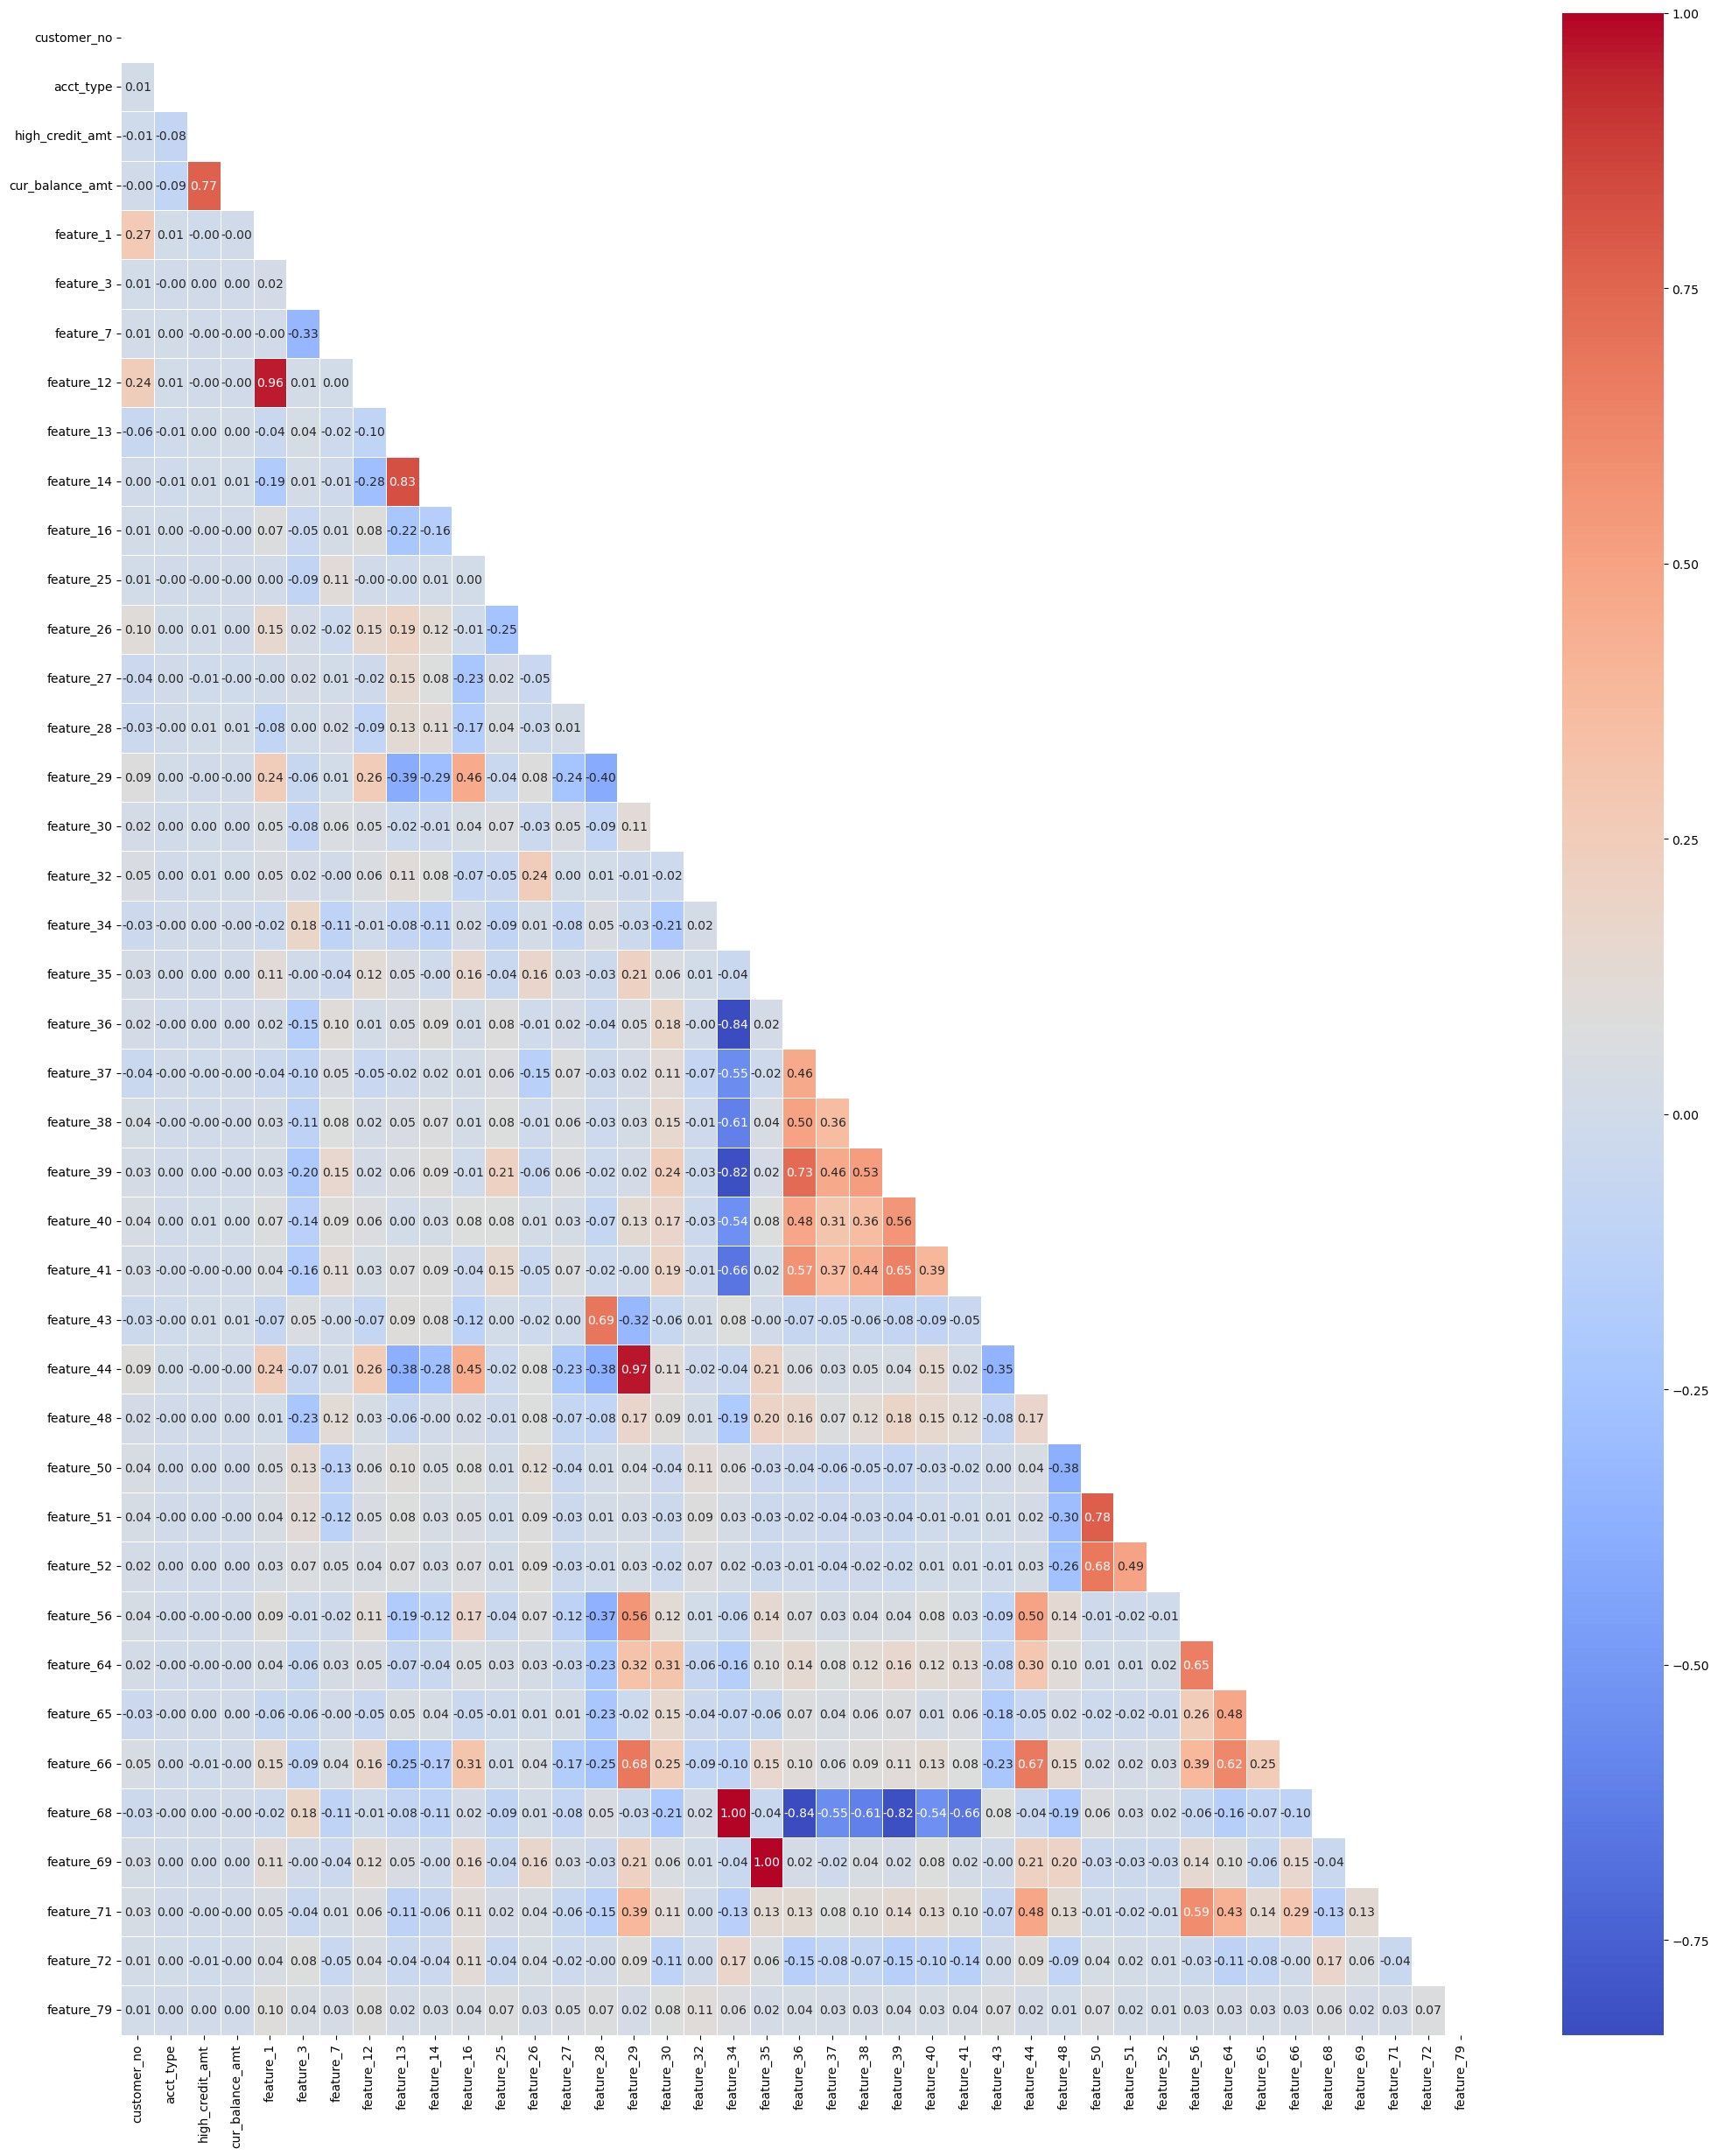

In [85]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = Corr_data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(25, 30))

# Create a heatmap using Seaborn with the mask
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5, mask=mask)

# Show the plot
plt.show()


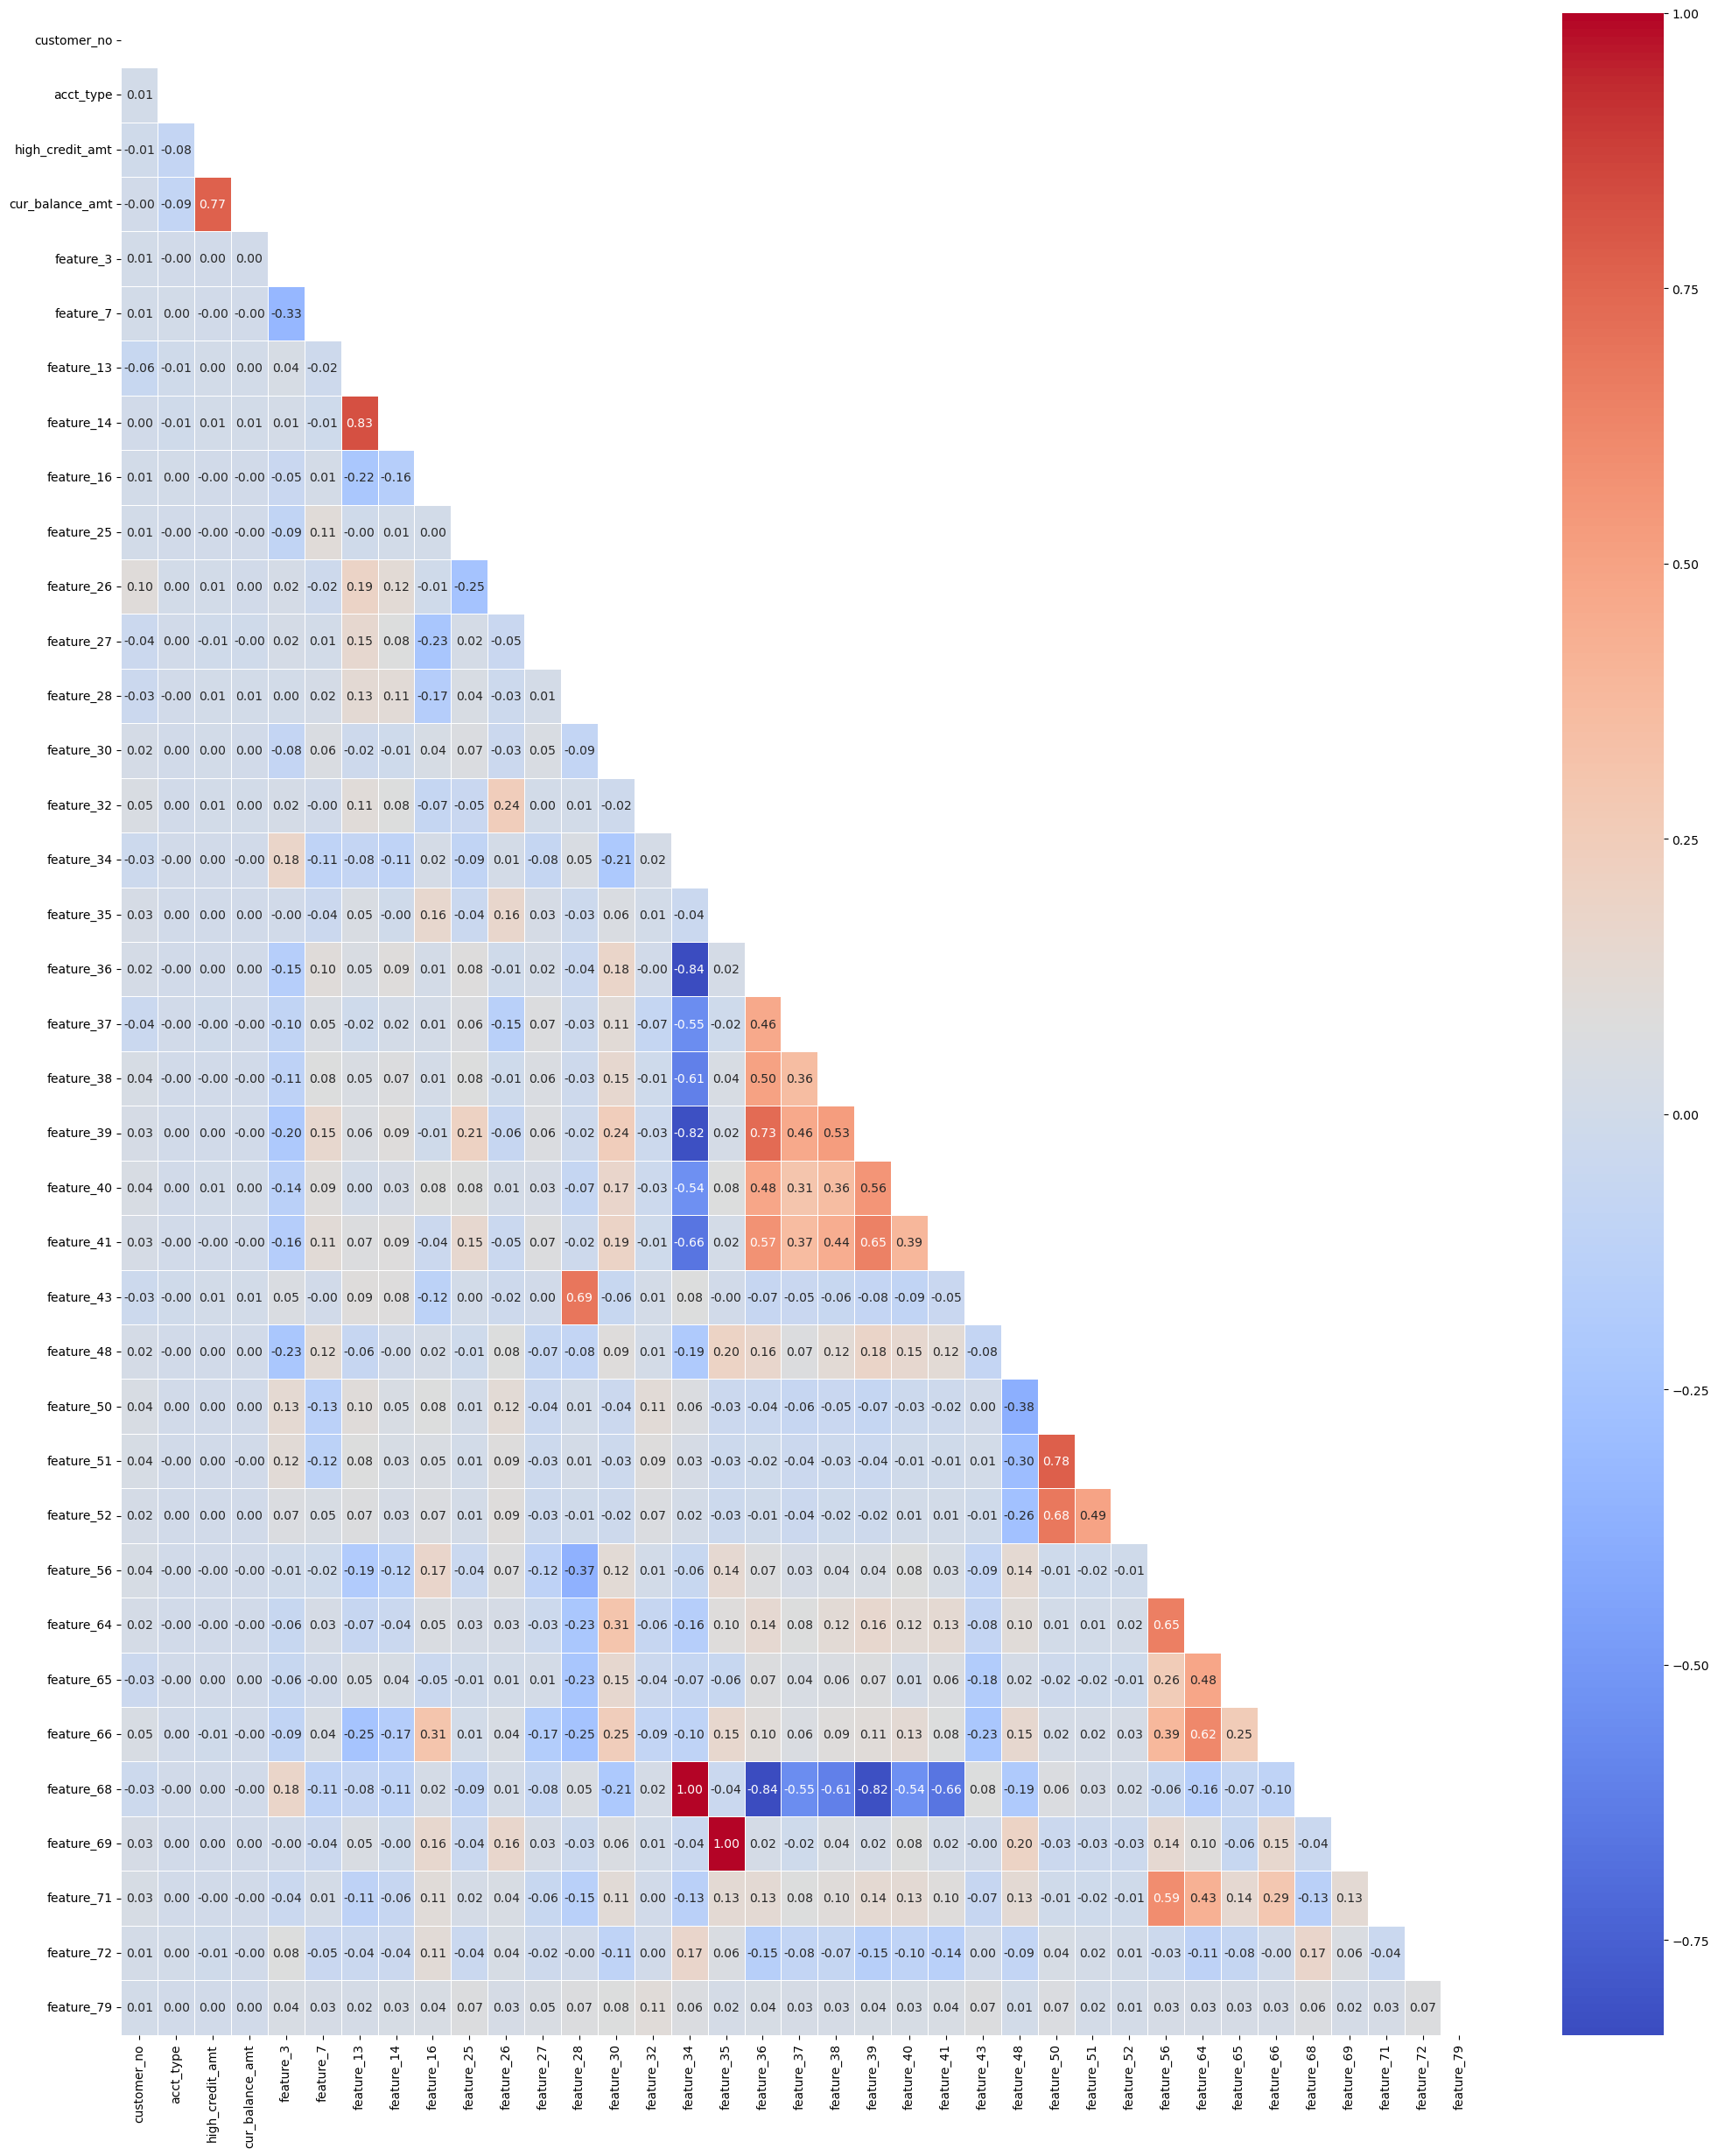

Removed columns due to high correlation: ['feature_1', 'feature_12', 'feature_29', 'feature_44']


In [86]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = Corr_data.corr()

# Create a mask for self-correlation (diagonal) and values above 0.90
high_corr = (correlation_matrix.abs() > 0.90) & (correlation_matrix != 1.0)

# Identify columns to drop (if any correlation is above 0.90)
cols_to_drop = high_corr.any(axis=0)
filtered_data = Corr_data.loc[:, ~cols_to_drop]

# Recalculate the correlation matrix after dropping columns
filtered_correlation_matrix = filtered_data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(filtered_correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(25, 30))

# Create a heatmap using Seaborn with the mask
sns.heatmap(filtered_correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5, mask=mask)

# Show the plot
plt.show()

# Print removed columns
print("Removed columns due to high correlation:", Corr_data.columns[cols_to_drop].tolist())


# Model Creation:

In [87]:
df

,dt_opened_x,customer_no,upload_dt,acct_type,opened_dt,last_paymt_dt,reporting_dt,high_credit_amt,cur_balance_amt,paymt_str_dt,paymt_end_dt,dt_opened_y,feature_1,feature_3,feature_7,feature_12,feature_13,feature_14,feature_16,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_43,feature_44,feature_48,feature_50,feature_51,feature_52,feature_56,feature_64,feature_65,feature_66,feature_68,feature_69,feature_71,feature_72,feature_79,Bad_label
0,2015-11-10,12265,2015-10-20,6,2013-06-09,2014-06-30,2015-09-30,20900.0,0,2015-09-01,2014-07-01,2015-11-10,4,0,214,8,6,2,207,1,1,6,43,79,21,5,2,1,0,0,0,1,1,1,48,80,0,1,0,1,1,1,55,79,2,1,1,2,1,1
1,2015-11-10,12265,2015-10-20,10,2012-05-25,2015-09-06,2015-10-03,16201.0,10390,2015-10-01,2012-11-01,2015-11-10,4,0,214,8,6,2,207,1,1,6,43,79,21,5,2,1,0,0,0,1,1,1,48,80,0,1,0,1,1,1,55,79,2,1,1,2,1,1
2,2015-11-10,12265,2015-10-20,10,2012-03-22,2015-08-31,2015-09-30,41028.0,34420,2015-09-01,2012-10-01,2015-11-10,4,0,214,8,6,2,207,1,1,6,43,79,21,5,2,1,0,0,0,1,1,1,48,80,0,1,0,1,1,1,55,79,2,1,1,2,1,1
3,2015-07-20,15606,2015-07-09,6,2015-01-18,2015-05-05,2015-05-31,20250.0,13500,2015-05-01,2015-01-01,2015-07-03,7,118,11,15,0,1,288,1,4,0,26,568,49,3,1,2572,7,2,4144,12,9,4,32,588,0,2,9,476,5,10,40,1745,1,2572,5,2,1,0
4,2015-07-20,15606,2015-07-09,6,2015-01-14,2015-05-02,2015-05-31,20000.0,8000,2015-05-01,2015-01-01,2015-07-03,7,118,11,15,0,1,288,1,4,0,26,568,49,3,1,2572,7,2,4144,12,9,4,32,588,0,2,9,476,5,10,40,1745,1,2572,5,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158755,2015-06-11,1611,2015-05-25,5,2008-04-29,2011-07-30,2011-07-31,130000.0,0,2011-07-01,2008-08-01,2015-10-27,5,256,324,11,0,1,200,1,1,0,43,32,1,3,1,185,9,2,1370,9,3,4,49,173,23,1,0,1,1,1,55,32,1,185,10,1,1,0
158756,2015-06-11,1611,2015-05-25,5,2007-10-08,2010-11-20,2010-11-30,75000.0,0,2010-11-01,2008-04-01,2015-10-27,5,256,324,11,0,1,200,1,1,0,43,32,1,3,1,185,9,2,1370,9,3,4,49,173,23,1,0,1,1,1,55,32,1,185,10,1,1,0
158757,2015-06-11,1611,2015-05-25,10,2007-05-30,2012-09-05,2014-02-28,29516.0,0,2012-09-01,2009-10-01,2015-10-27,5,256,324,11,0,1,200,1,1,0,43,32,1,3,1,185,9,2,1370,9,3,4,49,173,23,1,0,1,1,1,55,32,1,185,10,1,1,0
158758,2015-06-11,1611,2015-05-25,10,2007-05-02,2015-04-21,2015-04-30,24228.0,24228,2015-04-01,2012-05-01,2015-10-27,5,256,324,11,0,1,200,1,1,0,43,32,1,3,1,185,9,2,1370,9,3,4,49,173,23,1,0,1,1,1,55,32,1,185,10,1,1,0


In [88]:
import pandas as pd

# Identify datetime columns from your list
datetime_cols = ['dt_opened_x', 'upload_dt', 'opened_dt', 'last_paymt_dt', 
                 'reporting_dt', 'paymt_str_dt', 'paymt_end_dt', 'dt_opened_y']

# Convert datetime columns and extract Year, Month, and Day
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')  # Convert to datetime
    df[f'{col}_year'] = df[col].dt.year
    df[f'{col}_month'] = df[col].dt.month
    df[f'{col}_day'] = df[col].dt.day

# Drop original datetime columns (Optional)
df = df.drop(columns=datetime_cols)



In [158]:
df

,customer_no,acct_type,high_credit_amt,cur_balance_amt,feature_1,feature_3,feature_7,feature_12,feature_13,feature_14,feature_16,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_43,feature_44,feature_48,feature_50,feature_51,feature_52,feature_56,feature_64,feature_65,feature_66,feature_68,feature_69,feature_71,feature_72,feature_79,Bad_label,dt_opened_x_year,dt_opened_x_month,dt_opened_x_day,upload_dt_year,upload_dt_month,upload_dt_day,opened_dt_year,opened_dt_month,opened_dt_day,last_paymt_dt_year,last_paymt_dt_month,last_paymt_dt_day,reporting_dt_year,reporting_dt_month,reporting_dt_day,paymt_str_dt_year,paymt_str_dt_month,paymt_str_dt_day,paymt_end_dt_year,paymt_end_dt_month,paymt_end_dt_day,dt_opened_y_year,dt_opened_y_month,dt_opened_y_day
0,12265,6,20900.0,0,4,0,214,8,6,2,207,1,1,6,43,79,21,5,2,1,0,0,0,1,1,1,48,80,0,1,0,1,1,1,55,79,2,1,1,2,1,1,2015,11,10,2015,10,20,2013,6,9,2014,6,30,2015,9,30,2015,9,1,2014,7,1,2015,11,10
1,12265,10,16201.0,10390,4,0,214,8,6,2,207,1,1,6,43,79,21,5,2,1,0,0,0,1,1,1,48,80,0,1,0,1,1,1,55,79,2,1,1,2,1,1,2015,11,10,2015,10,20,2012,5,25,2015,9,6,2015,10,3,2015,10,1,2012,11,1,2015,11,10
2,12265,10,41028.0,34420,4,0,214,8,6,2,207,1,1,6,43,79,21,5,2,1,0,0,0,1,1,1,48,80,0,1,0,1,1,1,55,79,2,1,1,2,1,1,2015,11,10,2015,10,20,2012,3,22,2015,8,31,2015,9,30,2015,9,1,2012,10,1,2015,11,10
3,15606,6,20250.0,13500,7,118,11,15,0,1,288,1,4,0,26,568,49,3,1,2572,7,2,4144,12,9,4,32,588,0,2,9,476,5,10,40,1745,1,2572,5,2,1,0,2015,7,20,2015,7,9,2015,1,18,2015,5,5,2015,5,31,2015,5,1,2015,1,1,2015,7,3
4,15606,6,20000.0,8000,7,118,11,15,0,1,288,1,4,0,26,568,49,3,1,2572,7,2,4144,12,9,4,32,588,0,2,9,476,5,10,40,1745,1,2572,5,2,1,0,2015,7,20,2015,7,9,2015,1,14,2015,5,2,2015,5,31,2015,5,1,2015,1,1,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158755,1611,5,130000.0,0,5,256,324,11,0,1,200,1,1,0,43,32,1,3,1,185,9,2,1370,9,3,4,49,173,23,1,0,1,1,1,55,32,1,185,10,1,1,0,2015,6,11,2015,5,25,2008,4,29,2011,7,30,2011,7,31,2011,7,1,2008,8,1,2015,10,27
158756,1611,5,75000.0,0,5,256,324,11,0,1,200,1,1,0,43,32,1,3,1,185,9,2,1370,9,3,4,49,173,23,1,0,1,1,1,55,32,1,185,10,1,1,0,2015,6,11,2015,5,25,2007,10,8,2010,11,20,2010,11,30,2010,11,1,2008,4,1,2015,10,27
158757,1611,10,29516.0,0,5,256,324,11,0,1,200,1,1,0,43,32,1,3,1,185,9,2,1370,9,3,4,49,173,23,1,0,1,1,1,55,32,1,185,10,1,1,0,2015,6,11,2015,5,25,2007,5,30,2012,9,5,2014,2,28,2012,9,1,2009,10,1,2015,10,27
158758,1611,10,24228.0,24228,5,256,324,11,0,1,200,1,1,0,43,32,1,3,1,185,9,2,1370,9,3,4,49,173,23,1,0,1,1,1,55,32,1,185,10,1,1,0,2015,6,11,2015,5,25,2007,5,2,2015,4,21,2015,4,30,2015,4,1,2012,5,1,2015,10,27


In [89]:
x=df.drop('Bad_label',axis=1)
y=df[['Bad_label']]

In [144]:
x

,customer_no,acct_type,high_credit_amt,cur_balance_amt,feature_1,feature_3,feature_7,feature_12,feature_13,feature_14,feature_16,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_43,feature_44,feature_48,feature_50,feature_51,feature_52,feature_56,feature_64,feature_65,feature_66,feature_68,feature_69,feature_71,feature_72,feature_79,dt_opened_x_year,dt_opened_x_month,dt_opened_x_day,upload_dt_year,upload_dt_month,upload_dt_day,opened_dt_year,opened_dt_month,opened_dt_day,last_paymt_dt_year,last_paymt_dt_month,last_paymt_dt_day,reporting_dt_year,reporting_dt_month,reporting_dt_day,paymt_str_dt_year,paymt_str_dt_month,paymt_str_dt_day,paymt_end_dt_year,paymt_end_dt_month,paymt_end_dt_day,dt_opened_y_year,dt_opened_y_month,dt_opened_y_day
0,12265,6,20900.0,0,4,0,214,8,6,2,207,1,1,6,43,79,21,5,2,1,0,0,0,1,1,1,48,80,0,1,0,1,1,1,55,79,2,1,1,2,1,2015,11,10,2015,10,20,2013,6,9,2014,6,30,2015,9,30,2015,9,1,2014,7,1,2015,11,10
1,12265,10,16201.0,10390,4,0,214,8,6,2,207,1,1,6,43,79,21,5,2,1,0,0,0,1,1,1,48,80,0,1,0,1,1,1,55,79,2,1,1,2,1,2015,11,10,2015,10,20,2012,5,25,2015,9,6,2015,10,3,2015,10,1,2012,11,1,2015,11,10
2,12265,10,41028.0,34420,4,0,214,8,6,2,207,1,1,6,43,79,21,5,2,1,0,0,0,1,1,1,48,80,0,1,0,1,1,1,55,79,2,1,1,2,1,2015,11,10,2015,10,20,2012,3,22,2015,8,31,2015,9,30,2015,9,1,2012,10,1,2015,11,10
3,15606,6,20250.0,13500,7,118,11,15,0,1,288,1,4,0,26,568,49,3,1,2572,7,2,4144,12,9,4,32,588,0,2,9,476,5,10,40,1745,1,2572,5,2,1,2015,7,20,2015,7,9,2015,1,18,2015,5,5,2015,5,31,2015,5,1,2015,1,1,2015,7,3
4,15606,6,20000.0,8000,7,118,11,15,0,1,288,1,4,0,26,568,49,3,1,2572,7,2,4144,12,9,4,32,588,0,2,9,476,5,10,40,1745,1,2572,5,2,1,2015,7,20,2015,7,9,2015,1,14,2015,5,2,2015,5,31,2015,5,1,2015,1,1,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158755,1611,5,130000.0,0,5,256,324,11,0,1,200,1,1,0,43,32,1,3,1,185,9,2,1370,9,3,4,49,173,23,1,0,1,1,1,55,32,1,185,10,1,1,2015,6,11,2015,5,25,2008,4,29,2011,7,30,2011,7,31,2011,7,1,2008,8,1,2015,10,27
158756,1611,5,75000.0,0,5,256,324,11,0,1,200,1,1,0,43,32,1,3,1,185,9,2,1370,9,3,4,49,173,23,1,0,1,1,1,55,32,1,185,10,1,1,2015,6,11,2015,5,25,2007,10,8,2010,11,20,2010,11,30,2010,11,1,2008,4,1,2015,10,27
158757,1611,10,29516.0,0,5,256,324,11,0,1,200,1,1,0,43,32,1,3,1,185,9,2,1370,9,3,4,49,173,23,1,0,1,1,1,55,32,1,185,10,1,1,2015,6,11,2015,5,25,2007,5,30,2012,9,5,2014,2,28,2012,9,1,2009,10,1,2015,10,27
158758,1611,10,24228.0,24228,5,256,324,11,0,1,200,1,1,0,43,32,1,3,1,185,9,2,1370,9,3,4,49,173,23,1,0,1,1,1,55,32,1,185,10,1,1,2015,6,11,2015,5,25,2007,5,2,2015,4,21,2015,4,30,2015,4,1,2012,5,1,2015,10,27


In [91]:
y.head()

,Bad_label
0,1
1,1
2,1
3,0
4,0


#### BALANCING THE TARGET COLUMN USING SMOTE

In [92]:
df.Bad_label.value_counts()

Bad_label
0    152257
1      6503
Name: count, dtype: int64

There is imbalanced data we need to convert them into balanced form

In [93]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
x_balanced, y_balanced = smote.fit_resample(x, y)

# Convert y_balanced to a NumPy array and flatten it
y_balanced = y_balanced.to_numpy().ravel()  # Fix: Ensure it's a NumPy array before using ravel()

# Print class distribution
print(f'Original class distribution in y_train:\n{y.value_counts()}')
print(f'Balanced class distribution in y_train:\n{pd.Series(y_balanced).value_counts()}')


Original class distribution in y_train:
Bad_label
0            152257
1              6503
Name: count, dtype: int64
Balanced class distribution in y_train:
1    152257
0    152257
Name: count, dtype: int64


#### SHOWING BALANCED DATA BY GRAPH

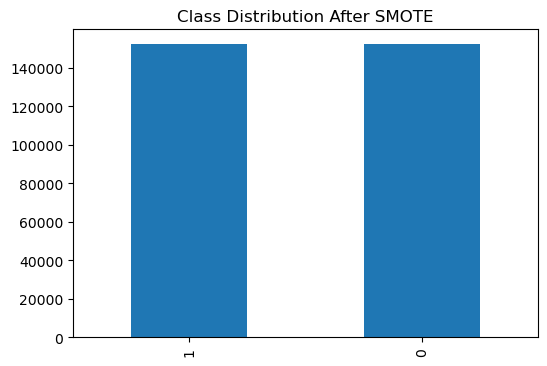

In [94]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
pd.Series(y_balanced).value_counts().plot(kind='bar', title='Class Distribution After SMOTE')
plt.show()

## Splitting the data

In [95]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_balanced,y_balanced,random_state=42,test_size=0.30)

In [96]:
# Check shape of train and test
x_train.shape

(213159, 65)

In [97]:
x_test.shape

(91355, 65)

In [98]:
y_train.shape

(213159,)

In [99]:
y_test.shape

(91355,)

In [100]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score ,recall_score # Import required metrics

# 1.Logistic Regression

In [101]:
#Train a Logistic Regression model
log_reg = LogisticRegression(random_state=42)  # Create Logistic Regression object
log_reg.fit(x_train, y_train)  # Fit the model on resampled data

LogisticRegression(random_state=42)

In [102]:
# Step 6: Make predictions on the test set
y_pred_test = log_reg.predict(x_test)  # Predict on the test data
y_pred_train=log_reg.predict(x_train) #Predict on the train data

# Model Evaluation:

In [103]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,classification_report,mean_squared_error,mean_absolute_error,accuracy_score

In [104]:
# Print accuracy score
log_test_accuracy = accuracy_score(y_pred_test, y_test)
log_train_accuracy=accuracy_score(y_pred_train,y_train)

print("Testing accuracy of Logistic regression model",log_test_accuracy)
print("Training accuracy of Logistic regression model",log_train_accuracy)
print("Logistic regression training Classification report: \n",classification_report(y_pred_test,y_test))

# Print confusion matrix for a more detailed evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_pred_test,y_test))

Testing accuracy of Logistic regression model 0.5300859285206064
Training accuracy of Logistic regression model 0.5311058880929259
Logistic regression training Classification report: 
               precision    recall  f1-score   support

           0       0.46      0.53      0.49     39069
           1       0.60      0.53      0.56     52286

    accuracy                           0.53     91355
   macro avg       0.53      0.53      0.53     91355
weighted avg       0.54      0.53      0.53     91355

Confusion Matrix:
[[20883 18186]
 [24743 27543]]


# Plotting ROC Curve:

In [105]:
from sklearn.metrics import roc_curve,roc_auc_score
%matplotlib inline

0.5493211961192566


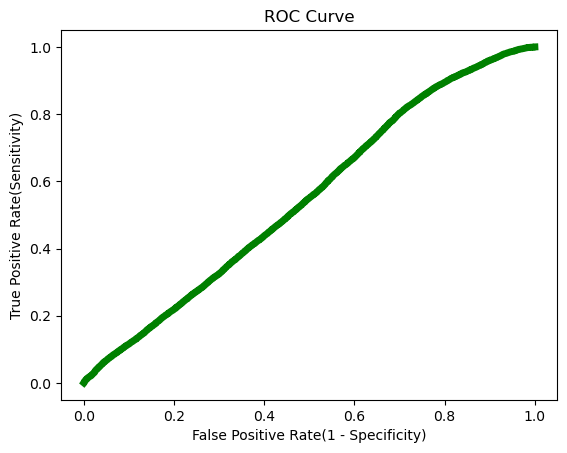

In [106]:
y_predict1 =log_reg .predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_predict1)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr,tpr,color='green',lw=5)
print(roc_auc_score(y_test,y_predict1))
plt.show()

In [107]:
log_f1_score_test = recall_score(y_pred_test,y_test)
print('F1 log test Score',log_f1_score_test*100)

F1 log test Score 52.67758099682516


In [108]:
log_f1_score_train = recall_score(y_pred_train,y_train)
print('F1 log train Score',log_f1_score_train*100)

F1 log train Score 52.693110647181626


# Decision Tree:

In [109]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dt=DecisionTreeClassifier(max_depth=10, random_state=2)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, random_state=2)

In [110]:
y_pred_test= dt.predict(x_test)
y_pred_train= dt.predict(x_train)

# Model Evaluation:

In [111]:
from sklearn.metrics import accuracy_score
dt_test_accuracy = accuracy_score(y_pred_test,y_test)
dt_train_accuracy=accuracy_score(y_pred_train,y_train)

print("Testing accuracy of DT model is:",dt_test_accuracy)
print("Training accuracy of DT model is:",dt_train_accuracy)

print("Confusion Matrix:")
print(confusion_matrix(y_pred_test,y_test ))
print("Classification report of testing:"'\n',classification_report(y_pred_test,y_test))

Testing accuracy of DT model is: 0.8675825077992447
Training accuracy of DT model is: 0.8700500565305711
Confusion Matrix:
[[40600  7071]
 [ 5026 38658]]
Classification report of testing:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87     47671
           1       0.85      0.88      0.86     43684

    accuracy                           0.87     91355
   macro avg       0.87      0.87      0.87     91355
weighted avg       0.87      0.87      0.87     91355



In [112]:
dt_f1_score = f1_score(y_pred_test,y_test)
print("F1 score of test DT:",dt_f1_score*100)

F1 score of test DT: 86.4706474450024


In [113]:
dt_f1_score_train = recall_score(y_pred_train,y_train)
print('F1 dt train Score',dt_f1_score_train*100)

F1 dt train Score 88.82081790245056


# Hyperparametric Tunning:

In [114]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [ 'sqrt', 'log2', None]
}
dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt_classifier, param_grid, scoring='r2', cv=5, verbose=2)
grid_search.fit(x, y)
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.6s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.6s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.6s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.6s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.6s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.6s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.6s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.6s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.5s
[CV] END max_depth=3, max_fe

In [115]:
dtcls=DecisionTreeClassifier(max_depth= 3,max_features='sqrt',min_samples_leaf=4,min_samples_split=2)

In [116]:
dtcls.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=4)

In [117]:
y_predict=dtcls.predict(x_test)

# Model Evaluation:

In [118]:
dt1_acc_sc=accuracy_score(y_predict,y_test)
print(dt1_acc_sc)

0.7087844124568989


In [119]:
dt1_cls_rep=classification_report(y_test,y_predict)
print(dt1_cls_rep)

              precision    recall  f1-score   support

           0       0.75      0.63      0.68     45626
           1       0.68      0.79      0.73     45729

    accuracy                           0.71     91355
   macro avg       0.71      0.71      0.71     91355
weighted avg       0.71      0.71      0.71     91355



Insights:
     Our DecisionTree Classifier  model had an initial  score of 98% before hyperparameter tuning.
After tuning, the model's score is 96%, signifying that the tuned DecisionTree model explains approximately 96% of the variance, marking a substantial improvement in predictive performance compared to the original model.

# Gradient Boosting:

In [120]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)

GradientBoostingClassifier()

In [121]:
y_pred_test= GBC.predict(x_test)
y_pred_train= GBC.predict(x_train)

# Model Evaluation:

In [122]:
from sklearn.metrics import accuracy_score
GBC_test_accuracy = accuracy_score(y_pred_test,y_test)
GBC_train_accuracy=accuracy_score(y_pred_train,y_train)

print("Testing accuracy of DT model is:",GBC_test_accuracy)
print("Training accuracy of DT model is:",GBC_train_accuracy)

print("Confusion Matrix:")
print(confusion_matrix(y_pred_test,y_test ))
print("Classification report of testing:"'\n',classification_report(y_pred_test,y_test))

Testing accuracy of DT model is: 0.9316074653822998
Training accuracy of DT model is: 0.9320882533695505
Confusion Matrix:
[[44158  4780]
 [ 1468 40949]]
Classification report of testing:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93     48938
           1       0.90      0.97      0.93     42417

    accuracy                           0.93     91355
   macro avg       0.93      0.93      0.93     91355
weighted avg       0.93      0.93      0.93     91355



In [123]:
GBC_f1_score = f1_score(y_pred_test,y_test)
print("F1 score of test GBC :",GBC_f1_score*100)

F1 score of test GBC : 92.91176003448824


In [124]:
GBC_f1_score_train = recall_score(y_pred_train,y_train)
print('F1 GBC train Score',GBC_f1_score_train*100)

F1 GBC train Score 96.68330087633885


# KNN Classifier:

In [125]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [126]:
y_pred_test= knn.predict(x_test)
y_pred_train= knn.predict(x_train)

# Model Evaluation:

In [127]:
from sklearn.metrics import accuracy_score
knn_test_accuracy = accuracy_score(y_pred_test,y_test)
knn_train_accuracy=accuracy_score(y_pred_train,y_train)

print("Testing accuracy of Knn model is:",knn_test_accuracy)
print("Training accuracy of Knn model is:",knn_train_accuracy)

print("Confusion Matrix:")
print(confusion_matrix(y_pred_test,y_test ))
print("Classification report of testing:"'\n',classification_report(y_pred_test,y_test))

Testing accuracy of Knn model is: 0.8673854742488096
Training accuracy of Knn model is: 0.9059950553342809
Confusion Matrix:
[[34247   736]
 [11379 44993]]
Classification report of testing:
               precision    recall  f1-score   support

           0       0.75      0.98      0.85     34983
           1       0.98      0.80      0.88     56372

    accuracy                           0.87     91355
   macro avg       0.87      0.89      0.87     91355
weighted avg       0.89      0.87      0.87     91355



In [128]:
knn_f1_score = f1_score(y_pred_test,y_test)
print("F1 score of test knn :",knn_f1_score*100)

F1 score of test knn : 88.13429839080909


In [129]:
knn_f1_score_train = recall_score(y_pred_train,y_train)
print('F1 knn train Score',knn_f1_score_train*100)

F1 knn train Score 84.6675538311074


0.9479128140057658


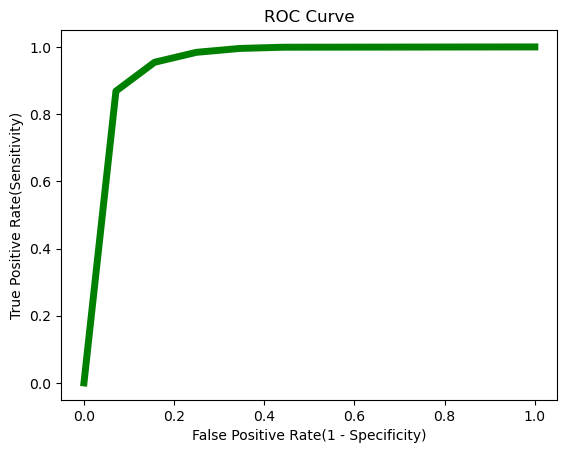

In [130]:
y_predict1 =knn.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_predict1)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr,tpr,color='green',lw=5)
print(roc_auc_score(y_test,y_predict1))
plt.show()

Insights:Our KNN model's prediction accuracy score is 96%. so our linear regression model accounts for approximately 96% of the variance.

# Random Forest Classifier:

In [131]:
from sklearn.ensemble import RandomForestClassifier
RVC=RandomForestClassifier()
RVC.fit(x_train, y_train)

RandomForestClassifier()

In [132]:
y_pred_test= RVC.predict(x_test)
y_pred_train= RVC.predict(x_train)

# Model Evaluation:

In [133]:
from sklearn.metrics import accuracy_score
RVC_test_accuracy = accuracy_score(y_pred_test,y_test)
RVC_train_accuracy=accuracy_score(y_pred_train,y_train)

print("Testing accuracy of Knn model is:",RVC_test_accuracy)
print("Training accuracy of Knn model is:",RVC_train_accuracy)

print("Confusion Matrix:")
print(confusion_matrix(y_pred_test,y_test ))
print("Classification report of testing:"'\n',classification_report(y_pred_test,y_test))

Testing accuracy of Knn model is: 0.9972853155273385
Training accuracy of Knn model is: 1.0
Confusion Matrix:
[[45608   230]
 [   18 45499]]
Classification report of testing:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     45838
           1       0.99      1.00      1.00     45517

    accuracy                           1.00     91355
   macro avg       1.00      1.00      1.00     91355
weighted avg       1.00      1.00      1.00     91355



In [134]:
RVC_f1_score = f1_score(y_pred_test,y_test)
print("F1 score of test knn :",RVC_f1_score*100)

F1 score of test knn : 99.72820726388007


In [135]:
RVC_f1_score_train = recall_score(y_pred_train,y_train)
print('F1 knn train Score',RVC_f1_score_train*100)

F1 knn train Score 100.0


### Create a DataFrame for Training And testing model comparison

In [137]:
# Create a DataFrame for model comparison
models_comparison = {
    "Model": ["Logistic Regression","Decision Tree Classifier","Gradient Boosting","KNN Classifier","Random Forest Classification "],
    "Train F1 Score": [52.69, 88.82, 96.68,84.66,99.70],
    "Test F1 Score": [ 52.677, 86.47, 92.911,88.134,100.0]
}

# Convert dictionary to a DataFrame
metrics_df = pd.DataFrame(models_comparison)

# Display the table
metrics_df

,Model,Train F1 Score,Test F1 Score
0,Logistic Regression,52.69,52.677
1,Decision Tree Classifier,88.82,86.470
2,Gradient Boosting,96.68,92.911
3,KNN Classifier,84.66,88.134
4,Random Forest Classification,99.70,100.000


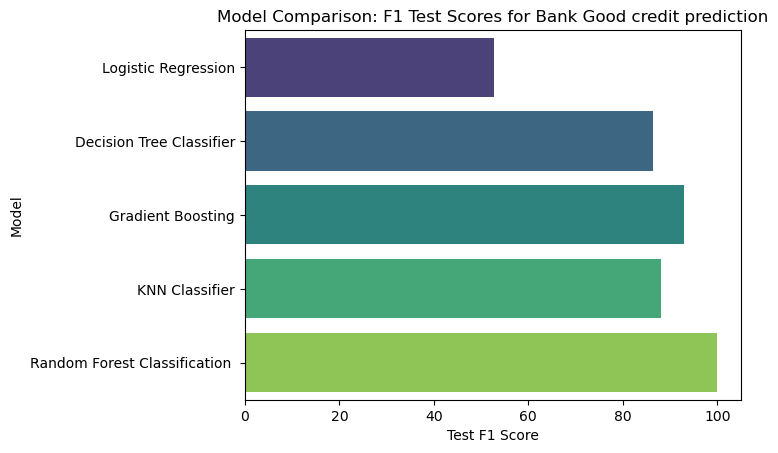

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="Test F1 Score", y="Model", data=metrics_df, palette="viridis")
plt.title("Model Comparison: F1 Test Scores for Bank Good credit prediction")
plt.show()

#### SAVE AND LOAD MODEL

In [139]:
import pickle

filename = 'Bank_Good_Credit_Prediction_Project.pkl'

# Save the model to a file
with open(filename, 'wb') as f:
    pickle.dump(RVC,f)
print("Model saved successfully!")

Model saved successfully!


#### LOADING MODEL

In [140]:
# Load the saved model
with open(filename, 'rb') as f:
    loaded_model = pickle.load(f)

# Use the loaded model to make predictions
predictions = loaded_model.predict(x_test)
print(predictions)


[0 0 1 ... 0 1 0]


In [156]:
df

,customer_no,acct_type,high_credit_amt,cur_balance_amt,feature_1,feature_3,feature_7,feature_12,feature_13,feature_14,feature_16,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_43,feature_44,feature_48,feature_50,feature_51,feature_52,feature_56,feature_64,feature_65,feature_66,feature_68,feature_69,feature_71,feature_72,feature_79,Bad_label,dt_opened_x_year,dt_opened_x_month,dt_opened_x_day,upload_dt_year,upload_dt_month,upload_dt_day,opened_dt_year,opened_dt_month,opened_dt_day,last_paymt_dt_year,last_paymt_dt_month,last_paymt_dt_day,reporting_dt_year,reporting_dt_month,reporting_dt_day,paymt_str_dt_year,paymt_str_dt_month,paymt_str_dt_day,paymt_end_dt_year,paymt_end_dt_month,paymt_end_dt_day,dt_opened_y_year,dt_opened_y_month,dt_opened_y_day
0,12265,6,20900.0,0,4,0,214,8,6,2,207,1,1,6,43,79,21,5,2,1,0,0,0,1,1,1,48,80,0,1,0,1,1,1,55,79,2,1,1,2,1,1,2015,11,10,2015,10,20,2013,6,9,2014,6,30,2015,9,30,2015,9,1,2014,7,1,2015,11,10
1,12265,10,16201.0,10390,4,0,214,8,6,2,207,1,1,6,43,79,21,5,2,1,0,0,0,1,1,1,48,80,0,1,0,1,1,1,55,79,2,1,1,2,1,1,2015,11,10,2015,10,20,2012,5,25,2015,9,6,2015,10,3,2015,10,1,2012,11,1,2015,11,10
2,12265,10,41028.0,34420,4,0,214,8,6,2,207,1,1,6,43,79,21,5,2,1,0,0,0,1,1,1,48,80,0,1,0,1,1,1,55,79,2,1,1,2,1,1,2015,11,10,2015,10,20,2012,3,22,2015,8,31,2015,9,30,2015,9,1,2012,10,1,2015,11,10
3,15606,6,20250.0,13500,7,118,11,15,0,1,288,1,4,0,26,568,49,3,1,2572,7,2,4144,12,9,4,32,588,0,2,9,476,5,10,40,1745,1,2572,5,2,1,0,2015,7,20,2015,7,9,2015,1,18,2015,5,5,2015,5,31,2015,5,1,2015,1,1,2015,7,3
4,15606,6,20000.0,8000,7,118,11,15,0,1,288,1,4,0,26,568,49,3,1,2572,7,2,4144,12,9,4,32,588,0,2,9,476,5,10,40,1745,1,2572,5,2,1,0,2015,7,20,2015,7,9,2015,1,14,2015,5,2,2015,5,31,2015,5,1,2015,1,1,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158755,1611,5,130000.0,0,5,256,324,11,0,1,200,1,1,0,43,32,1,3,1,185,9,2,1370,9,3,4,49,173,23,1,0,1,1,1,55,32,1,185,10,1,1,0,2015,6,11,2015,5,25,2008,4,29,2011,7,30,2011,7,31,2011,7,1,2008,8,1,2015,10,27
158756,1611,5,75000.0,0,5,256,324,11,0,1,200,1,1,0,43,32,1,3,1,185,9,2,1370,9,3,4,49,173,23,1,0,1,1,1,55,32,1,185,10,1,1,0,2015,6,11,2015,5,25,2007,10,8,2010,11,20,2010,11,30,2010,11,1,2008,4,1,2015,10,27
158757,1611,10,29516.0,0,5,256,324,11,0,1,200,1,1,0,43,32,1,3,1,185,9,2,1370,9,3,4,49,173,23,1,0,1,1,1,55,32,1,185,10,1,1,0,2015,6,11,2015,5,25,2007,5,30,2012,9,5,2014,2,28,2012,9,1,2009,10,1,2015,10,27
158758,1611,10,24228.0,24228,5,256,324,11,0,1,200,1,1,0,43,32,1,3,1,185,9,2,1370,9,3,4,49,173,23,1,0,1,1,1,55,32,1,185,10,1,1,0,2015,6,11,2015,5,25,2007,5,2,2015,4,21,2015,4,30,2015,4,1,2012,5,1,2015,10,27


#### MAKING PREDICTION

In [155]:
input_data = np.array([
   12265, 6, 20900.0, 0, 4, 0, 214, 8, 6, 2, 207, 1, 1, 6, 43, 79, 21, 5, 2, 1, 0, 0, 0, 1, 1, 1, 48, 80, 0, 1, 0, 1, 1, 1, 55, 79, 2, 1, 1, 2, 1, 2015, 11, 10, 2015, 10, 20, 2013, 6, 9, 2014, 6, 30, 2015, 9, 30, 2015, 9, 1, 2014, 7, 1, 2015, 11, 10
])
# Reshape to 2D (1 row, N columns) 
input_data = input_data.reshape(1, -1) #ensures that the model sees the data as one sample with multiple features, instead of a single list of numbers.


# Now make the prediction
prediction = RVC.predict(input_data)
print(prediction)


[1]
